# Data Mining / Prospecção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 2 - Clustering

## Logistics 

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of `April, 18th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P2.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/)**.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

## Team Identification

**GROUP NNN**

Students:

* Student 1 - n_student1
* Student 2 - n_student2
* Student 3 - n_student3

## 1. Load and Preprocess Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

At the end of this step you should have:
* a 76 rows × 54675 columns matrix, **X**, containing the values of the 54675 features for each of the 76 samples.
* a vector, **y**, with the 76 type of medulloblastoma, which you can use later to evaluate clustering quality.

The dataset to be analysed is **`medulloblastoma_genes.csv`**. It includes 76 samples of medulloblastoma (MB) with respective expression levels of 54.675 genes measured in children with ages between 3 and 16 years. Medulloblastoma is a malignant childhood brain tumour comprising four discrete subgroups. 

In [3]:
X = pd.read_csv("medulloblastoma_genes.csv")

In [4]:
X.to_pickle("./medulloblastoma_genes.pkl")

In [5]:
X = pd.read_pickle('medulloblastoma_genes.pkl')

In [6]:
X.isna().sum().sum() #checking for null values

0

In [ ]:
X.duplicated().sum() #checking for duplicated features

In [32]:
X.rename(columns = {'Unnamed: 0': 'samples'}, inplace = True)

In [33]:
X.samples.nunique() #there are 76 unique samples

76

In [34]:
X_samples = X.samples

In [35]:
X.drop(['samples'],axis=1, inplace=True) #removing the id

In [36]:
X.shape

(76, 54675)

In [37]:
X.head(2)

1007_s_at  1053_at   117_at   121_at  1255_g_at  1294_at  1316_at  1320_at  \
0    7.59594  6.14440  4.82431  5.67092    4.14155  5.48935  6.01078  5.17671   
1    7.80665  6.19154  5.24439  5.62149    3.41773  5.70478  5.98896  3.45316   

   1405_i_at  1431_at  ...  AFFX-r2-Ec-bioD-3_at  AFFX-r2-Ec-bioD-5_at  \
0    4.83708  4.77996  ...               10.2364               10.1202   
1    4.34121  4.28772  ...               10.4747               10.4893   

   AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  AFFX-ThrX-3_at  AFFX-ThrX-5_at  \
0              11.5560              11.2308         6.94803         6.42487   
1              11.6799              11.3475         6.09785         4.38328   

   AFFX-ThrX-M_at  AFFX-TrpnX-3_at  AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0         6.70991          4.48639          4.43082          3.48738  
1         4.68583          3.40120          4.20916          4.40915  

[2 rows x 54675 columns]

In this project you will consider the labels of the samples included in the `labels.csv` file where samples are labelled as MB-CL or Other. In this case, we have 51 samples of classic medulloblastoma (MB-CL) and 25 other types (namely: 6 desmoplastic nodular, 17 anaplastic and 2 medullomyoblastoma).

In `medulloblastoma_genes.csv` each line represents a sample and each column represents a gene.


**The goal is to cluster samples and (ideally) find "MB-CL" groups and "Other MB" groups.** 

In [518]:
y = pd.read_csv("labels.csv")
y

samples  class
0   GSM918578  MB-CL
1   GSM918579  MB-CL
2   GSM918580  MB-CL
3   GSM918581  MB-CL
4   GSM918582  Other
..        ...    ...
71  GSM918649  Other
72  GSM918650  MB-CL
73  GSM918651  Other
74  GSM918652  MB-CL
75  GSM918653  MB-CL

[76 rows x 2 columns]

In [139]:
y_samples = y.samples

In [142]:
classes = np.unique(y_samples)
n_classes = len(classes)
print('Total number of classes = ', n_classes) #there are 76 unique values as we expect
print('Output classes = ', classes)

Total number of classes =  76
Output classes =  ['GSM918578' 'GSM918579' 'GSM918580' 'GSM918581' 'GSM918582' 'GSM918583'
 'GSM918584' 'GSM918585' 'GSM918586' 'GSM918587' 'GSM918588' 'GSM918589'
 'GSM918590' 'GSM918591' 'GSM918592' 'GSM918593' 'GSM918594' 'GSM918595'
 'GSM918596' 'GSM918597' 'GSM918598' 'GSM918599' 'GSM918600' 'GSM918601'
 'GSM918602' 'GSM918603' 'GSM918604' 'GSM918605' 'GSM918606' 'GSM918607'
 'GSM918608' 'GSM918609' 'GSM918610' 'GSM918611' 'GSM918612' 'GSM918613'
 'GSM918614' 'GSM918615' 'GSM918616' 'GSM918617' 'GSM918618' 'GSM918619'
 'GSM918620' 'GSM918621' 'GSM918622' 'GSM918623' 'GSM918624' 'GSM918625'
 'GSM918626' 'GSM918627' 'GSM918628' 'GSM918629' 'GSM918630' 'GSM918631'
 'GSM918632' 'GSM918633' 'GSM918634' 'GSM918635' 'GSM918636' 'GSM918637'
 'GSM918638' 'GSM918639' 'GSM918640' 'GSM918641' 'GSM918642' 'GSM918643'
 'GSM918644' 'GSM918645' 'GSM918646' 'GSM918647' 'GSM918648' 'GSM918649'
 'GSM918650' 'GSM918651' 'GSM918652' 'GSM918653']


In [143]:
#sanity check
(X_samples == y_samples).all()

True

In [519]:
y.drop(['samples'],axis=1, inplace=True)

In [521]:
y = y.reset_index()
y

index  class
0       0  MB-CL
1       1  MB-CL
2       2  MB-CL
3       3  MB-CL
4       4  Other
..    ...    ...
71     71  Other
72     72  MB-CL
73     73  Other
74     74  MB-CL
75     75  MB-CL

[76 rows x 2 columns]

In [522]:
y.drop('index',axis=1,inplace=True)

In [523]:
y

class
0   MB-CL
1   MB-CL
2   MB-CL
3   MB-CL
4   Other
..    ...
71  Other
72  MB-CL
73  Other
74  MB-CL
75  MB-CL

[76 rows x 1 columns]

## 2. Dimensionality Reduction

As you already noticed the number of features (genes) is extremely high when compared to the number of objects to cluster (samples). In this context, you should perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html)

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

At the end of this step you should have two new matrices with the same number of rows, each with a different number of columns (features): **X_variance** and **X_PCA**. 

**Don't change X you will need it!**

- Step 1: fit the scaler on the TRAINING data

- Step 2: use the scaler to transform the TRAINING data

- Step 3: use the transformed training data to fit the predictive model

- Step 4: use the scaler to transform the TEST data

- Step 5: predict using the trained model (step 3) and the transformed TEST data (step 4).



- A low variance feature means a feature that lacks information. In our X dataframe we have different variables which take different values and, as such, they have different variances. So we will scaling the features to compare their information on the same scale.

- All columns with variance lower than a given threshold are removed. A word of caution: variance is range dependent; therefore normalization is required before applying this technique.

- Usually, VarianceThreshold is used to remove features with variance equal to zero, that is constants that provide no information whatsoever.

- In order to remove features with low variance, we need first to define what is the reasonable threshold for that specific feature.

    - StandardScaler: all your features will be cenetered and normed, so their mean will be zero, and variance 1 (except for the constants, of course)
    - MinMaxScaler by default will bring your features into a range [0;1] (the basic idea of minmaxscaler is to normalize your data that means you will have less variance in it.)

The optimal threshold can be defined through an optimization loop maximizing the classification accuracy on a validation set for the best out of three classification algorithms: MLP, decision tree, and Naïve Bayes.  https://mineracaodedados.files.wordpress.com/2015/06/knime_seventechniquesdatadimreduction.pdf

https://cdn.analyticsvidhya.com/wp-content/uploads/2018/08/Screenshot-from-2018-08-10-12-07-43.png
https://mclguide.readthedocs.io/en/latest/sklearn/dimension.html

In [92]:
from sklearn.model_selection import train_test_split

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [169]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
#print('Traning data shape:', X_train.shape)
#print('Testing data shape:', X_test.shape)
#print('Traning label shape:', y_train.shape)
#print('Testing label shape:', y_test.shape)

Traning data shape: (60, 54675)
Testing data shape: (16, 54675)
Traning label shape: (60, 1)
Testing label shape: (16, 1)


In [86]:
threshold_n=[0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35,0.3,0.25,0.2,0.15,0.1,0.05,0.0]

In [124]:
low_var_pd = []
for i in threshold_n:
    constant_filter = VarianceThreshold(threshold=i)
    constant_filter.fit(X)
    low_var_pd.append((i, 
                      len(X.columns[constant_filter.get_support()]), 
                       len(X.columns)-len(X.columns[constant_filter.get_support()])))

In [126]:
low_var_pd = pd.DataFrame(low_var_pd, columns=('Threshold', 'Columns Remaining', 'Columns Removed'))
low_var_pd

Threshold  Columns Remaining  Columns Removed
0        0.95               2256            52419
1        0.90               2527            52148
2        0.85               2861            51814
3        0.80               3257            51418
4        0.75               3658            51017
5        0.70               4201            50474
6        0.65               4800            49875
7        0.60               5530            49145
8        0.55               6436            48239
9        0.50               7533            47142
10       0.45               9036            45639
11       0.40              11036            43639
12       0.35              13754            40921
13       0.30              18063            36612
14       0.25              25123            29552
15       0.20              34456            20219
16       0.15              43175            11500
17       0.10              50362             4313
18       0.05              54230              445
19       0.00              54675                0

In [543]:
selector = VarianceThreshold(0.8)
selector= selector.fit(X) #X_train

In [545]:
X_low_variance = X.loc[:, selector.get_support()]

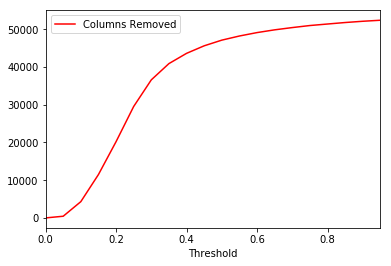

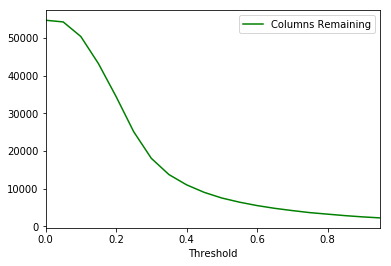

In [546]:
low_var_pd.plot.line(x='Threshold', y='Columns Removed', c='r')
low_var_pd.plot.line(x='Threshold', y='Columns Remaining', c='g')

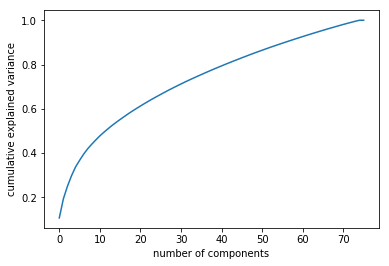

In [547]:
pca = PCA().fit(X) #X_train
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
#the first 10 components contain approximately 50% of the variance
#we'd need about 50 components to retain 90% of the variance (we would recover most of the essential characteristics of X_train)

In [548]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
#X_test_pca = pca.transform(X_test)

In [549]:
explained_variance = pca.explained_variance_ratio_

In [550]:
print("Explained Variance: %s" % len(pca.explained_variance_ratio_))

Explained Variance: 66


- To Conclude:

In [551]:
X_variance = X_low_variance
X_PCA = X_pca

In [552]:
X_variance.shape

(76, 3257)

In [553]:
X_PCA.shape

(76, 66)

# Ignore after this (sorry...)

In [ ]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [102]:
min_max_scaler = preprocessing.MinMaxScaler()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

In [94]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = SVC()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

(76, 54675)

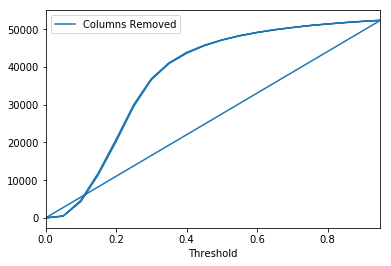

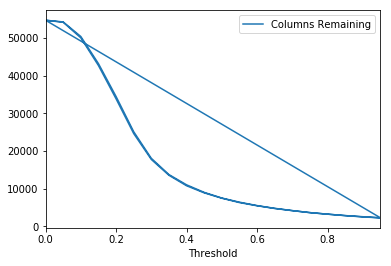

In [100]:
low_var_pd.plot.line(x='Threshold', y='Columns Removed')
low_var_pd.plot.line(x='Threshold', y='Columns Remaining')

In [ ]:
#chi square test is used to know if two categorical variables are related however we only have numerical variables in 
#the X matrix, as such, we will use 2 diff techniques: f-score and MI for numeric input and categorical output variables we have

In [ ]:
#numeric input and categorical output variables
#https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

   * 2.1. Removing features with low variance

In [51]:
X.var().sort_values(ascending=False)

1559213_at     7.930469
224588_at      7.566001
231776_at      6.322695
201909_at      6.127119
206018_at      6.088712
                 ...   
1569979_at     0.007053
240794_at      0.006338
240140_s_at    0.005129
239374_at      0.003290
230817_at      0.003193
Length: 54675, dtype: float64

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

chi2_score, chi_2_p_value = chi2(X,y)
f_score, f_p_value = f_classif(X,y)
mut_info_score = mutual_info_classif(X,y)

df_low_var=pd.DataFrame({"names": X.columns, 
                "chi2": chi2_score,
                "chi2_p": chi_2_p_value,
                "F": f_score,
                "F_p": f_p_value,
                "MI": mut_info_score})
df_low_var    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


names      chi2    chi2_p         F       F_p        MI
0            1007_s_at  0.000031  0.995576  0.001020  0.974610  0.000000
1              1053_at  0.002047  0.963912  0.110905  0.740058  0.000000
2               117_at  0.035508  0.850535  0.374656  0.542353  0.000000
3               121_at  0.074197  0.785322  6.412725  0.013451  0.087699
4            1255_g_at  0.330042  0.565634  1.558933  0.215757  0.029754
...                ...       ...       ...       ...       ...       ...
54670   AFFX-ThrX-5_at  0.003399  0.953509  0.012633  0.910813  0.000000
54671   AFFX-ThrX-M_at  0.006182  0.937331  0.036528  0.848953  0.061281
54672  AFFX-TrpnX-3_at  0.001430  0.969837  0.051181  0.821645  0.000000
54673  AFFX-TrpnX-5_at  0.061542  0.804075  1.703472  0.195878  0.065880
54674  AFFX-TrpnX-M_at  0.000184  0.989174  0.005429  0.941465  0.031146

[54675 rows x 6 columns]

It is easy to see which are the most important variables: Typically the ones with lowest p-value or highest MI

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (50, 54675) (50, 1)
Test (26, 54675) (26, 1)


## f-test Feature Selection

In [21]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [32]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.113903
Feature 1: 0.242673
Feature 2: 0.409245
Feature 3: 4.432182
Feature 4: 0.119391
Feature 5: 0.107629
Feature 6: 0.039479
Feature 7: 2.724599
Feature 8: 1.859395
Feature 9: 0.639521
Feature 10: 0.081936
Feature 11: 0.488551
Feature 12: 0.328420
Feature 13: 4.090280
Feature 14: 0.687970
Feature 15: 1.305136
Feature 16: 0.000876
Feature 17: 1.869319
Feature 18: 0.000000
Feature 19: 3.810907
Feature 20: 0.668451
Feature 21: 0.428644
Feature 22: 0.527058
Feature 23: 0.546237
Feature 24: 0.591204
Feature 25: 0.252846
Feature 26: 0.462337
Feature 27: 2.503766
Feature 28: 9.270429
Feature 29: 1.779437
Feature 30: 2.149039
Feature 31: 1.533164
Feature 32: 4.212248
Feature 33: 5.379999
Feature 34: 5.332120
Feature 35: 4.176445
Feature 36: 0.390187
Feature 37: 0.234911
Feature 38: 0.019413
Feature 39: 9.875138
Feature 40: 0.092247
Feature 41: 2.193661
Feature 42: 0.113468
Feature 43: 3.322846
Feature 44: 0.091669
Feature 45: 0.025155
Feature 46: 3.171657
Feature 47: 1.782257
Fe

Feature 1863: 0.893594
Feature 1864: 8.103165
Feature 1865: 0.144465
Feature 1866: 0.325026
Feature 1867: 1.612929
Feature 1868: 0.043185
Feature 1869: 0.150941
Feature 1870: 0.007245
Feature 1871: 1.067695
Feature 1872: 0.061460
Feature 1873: 4.946814
Feature 1874: 0.028216
Feature 1875: 0.158898
Feature 1876: 1.305155
Feature 1877: 0.607729
Feature 1878: 0.552289
Feature 1879: 0.003690
Feature 1880: 2.769621
Feature 1881: 2.663891
Feature 1882: 3.204090
Feature 1883: 1.248170
Feature 1884: 0.152974
Feature 1885: 0.060328
Feature 1886: 0.465871
Feature 1887: 0.739784
Feature 1888: 7.527102
Feature 1889: 0.780055
Feature 1890: 0.906742
Feature 1891: 0.885476
Feature 1892: 0.359699
Feature 1893: 1.486758
Feature 1894: 0.147301
Feature 1895: 0.982573
Feature 1896: 0.046038
Feature 1897: 7.240250
Feature 1898: 0.303677
Feature 1899: 2.491021
Feature 1900: 0.074007
Feature 1901: 0.250206
Feature 1902: 0.741624
Feature 1903: 0.224930
Feature 1904: 0.004823
Feature 1905: 0.046262
Feature 190

Feature 3594: 0.663449
Feature 3595: 0.233233
Feature 3596: 1.399897
Feature 3597: 4.411520
Feature 3598: 2.409622
Feature 3599: 1.174857
Feature 3600: 0.000175
Feature 3601: 0.000506
Feature 3602: 0.224523
Feature 3603: 8.449987
Feature 3604: 0.088108
Feature 3605: 0.115284
Feature 3606: 0.518398
Feature 3607: 1.188663
Feature 3608: 0.647192
Feature 3609: 4.340878
Feature 3610: 0.998205
Feature 3611: 4.228359
Feature 3612: 1.757952
Feature 3613: 2.830874
Feature 3614: 0.064401
Feature 3615: 0.032613
Feature 3616: 0.450716
Feature 3617: 0.840321
Feature 3618: 0.268493
Feature 3619: 0.659742
Feature 3620: 0.017050
Feature 3621: 0.204678
Feature 3622: 0.565981
Feature 3623: 2.770741
Feature 3624: 2.457442
Feature 3625: 0.586788
Feature 3626: 4.643643
Feature 3627: 0.142060
Feature 3628: 1.450872
Feature 3629: 0.646360
Feature 3630: 0.007761
Feature 3631: 0.183318
Feature 3632: 1.223331
Feature 3633: 1.779711
Feature 3634: 2.241640
Feature 3635: 0.908986
Feature 3636: 0.960346
Feature 363

Feature 5377: 7.070888
Feature 5378: 0.392694
Feature 5379: 0.295166
Feature 5380: 0.093564
Feature 5381: 0.085410
Feature 5382: 0.017335
Feature 5383: 1.326780
Feature 5384: 1.655833
Feature 5385: 0.000032
Feature 5386: 2.528937
Feature 5387: 0.032836
Feature 5388: 0.156625
Feature 5389: 0.097898
Feature 5390: 2.207433
Feature 5391: 0.588726
Feature 5392: 1.812358
Feature 5393: 0.121176
Feature 5394: 5.855639
Feature 5395: 15.125833
Feature 5396: 0.118437
Feature 5397: 3.636422
Feature 5398: 0.087087
Feature 5399: 0.159583
Feature 5400: 1.098471
Feature 5401: 0.281407
Feature 5402: 0.144962
Feature 5403: 2.759928
Feature 5404: 1.919003
Feature 5405: 0.272002
Feature 5406: 3.802707
Feature 5407: 1.570041
Feature 5408: 2.389354
Feature 5409: 0.006461
Feature 5410: 1.643798
Feature 5411: 0.032964
Feature 5412: 4.235238
Feature 5413: 1.236825
Feature 5414: 0.399005
Feature 5415: 1.934363
Feature 5416: 0.054019
Feature 5417: 0.389131
Feature 5418: 0.178573
Feature 5419: 0.555091
Feature 54

Feature 6875: 1.717364
Feature 6876: 0.097355
Feature 6877: 1.784908
Feature 6878: 0.666701
Feature 6879: 0.037646
Feature 6880: 1.299057
Feature 6881: 1.187790
Feature 6882: 0.013953
Feature 6883: 0.421047
Feature 6884: 0.027798
Feature 6885: 1.403559
Feature 6886: 0.090695
Feature 6887: 0.301155
Feature 6888: 1.117264
Feature 6889: 0.030140
Feature 6890: 0.019568
Feature 6891: 0.121161
Feature 6892: 0.215134
Feature 6893: 0.624958
Feature 6894: 0.280910
Feature 6895: 0.654298
Feature 6896: 0.020317
Feature 6897: 0.007349
Feature 6898: 1.193718
Feature 6899: 0.075789
Feature 6900: 0.147762
Feature 6901: 1.917568
Feature 6902: 5.490439
Feature 6903: 0.495515
Feature 6904: 0.021379
Feature 6905: 6.447347
Feature 6906: 0.290104
Feature 6907: 0.911748
Feature 6908: 0.138990
Feature 6909: 0.009252
Feature 6910: 0.642186
Feature 6911: 1.277589
Feature 6912: 0.304901
Feature 6913: 1.223812
Feature 6914: 0.006931
Feature 6915: 0.577357
Feature 6916: 1.280128
Feature 6917: 0.561202
Feature 691

Feature 8579: 0.015511
Feature 8580: 0.677998
Feature 8581: 0.320322
Feature 8582: 3.677035
Feature 8583: 0.850191
Feature 8584: 0.433955
Feature 8585: 0.000972
Feature 8586: 0.526823
Feature 8587: 1.335863
Feature 8588: 0.451055
Feature 8589: 0.858826
Feature 8590: 2.051884
Feature 8591: 1.333345
Feature 8592: 3.948298
Feature 8593: 1.902836
Feature 8594: 0.535872
Feature 8595: 0.000150
Feature 8596: 0.039652
Feature 8597: 0.005450
Feature 8598: 1.411708
Feature 8599: 0.100788
Feature 8600: 0.000855
Feature 8601: 5.227541
Feature 8602: 0.243660
Feature 8603: 0.215029
Feature 8604: 2.141730
Feature 8605: 0.756936
Feature 8606: 0.265088
Feature 8607: 1.965943
Feature 8608: 0.898875
Feature 8609: 0.031754
Feature 8610: 0.105276
Feature 8611: 0.002341
Feature 8612: 3.149711
Feature 8613: 0.130828
Feature 8614: 0.890401
Feature 8615: 0.362404
Feature 8616: 3.776866
Feature 8617: 1.847496
Feature 8618: 2.085651
Feature 8619: 5.152985
Feature 8620: 1.282775
Feature 8621: 0.305893
Feature 862

Feature 9873: 0.618342
Feature 9874: 0.063796
Feature 9875: 1.732345
Feature 9876: 0.160488
Feature 9877: 0.004299
Feature 9878: 1.038418
Feature 9879: 0.190108
Feature 9880: 1.123409
Feature 9881: 0.269424
Feature 9882: 0.267435
Feature 9883: 0.246670
Feature 9884: 1.103511
Feature 9885: 1.025307
Feature 9886: 0.159916
Feature 9887: 3.941136
Feature 9888: 5.606000
Feature 9889: 0.084392
Feature 9890: 0.000401
Feature 9891: 0.655782
Feature 9892: 0.871757
Feature 9893: 0.311590
Feature 9894: 0.497641
Feature 9895: 0.257129
Feature 9896: 0.351835
Feature 9897: 5.454687
Feature 9898: 0.424522
Feature 9899: 3.915895
Feature 9900: 0.093667
Feature 9901: 0.177934
Feature 9902: 0.007647
Feature 9903: 0.626941
Feature 9904: 2.942178
Feature 9905: 0.486933
Feature 9906: 2.715753
Feature 9907: 0.021238
Feature 9908: 0.636670
Feature 9909: 1.512065
Feature 9910: 0.070754
Feature 9911: 0.384579
Feature 9912: 0.825478
Feature 9913: 2.222342
Feature 9914: 0.069638
Feature 9915: 0.585997
Feature 991

Feature 11781: 0.083392
Feature 11782: 4.500013
Feature 11783: 0.177919
Feature 11784: 1.335961
Feature 11785: 2.652708
Feature 11786: 0.000081
Feature 11787: 0.029224
Feature 11788: 0.001829
Feature 11789: 2.209051
Feature 11790: 1.370790
Feature 11791: 0.382599
Feature 11792: 0.367357
Feature 11793: 3.305813
Feature 11794: 0.002441
Feature 11795: 0.584458
Feature 11796: 0.000109
Feature 11797: 4.783410
Feature 11798: 2.000957
Feature 11799: 0.018541
Feature 11800: 6.946956
Feature 11801: 0.302036
Feature 11802: 0.102418
Feature 11803: 0.525206
Feature 11804: 0.464998
Feature 11805: 0.595081
Feature 11806: 0.270128
Feature 11807: 0.005187
Feature 11808: 5.626999
Feature 11809: 7.812602
Feature 11810: 1.321771
Feature 11811: 0.804644
Feature 11812: 0.027393
Feature 11813: 1.470304
Feature 11814: 0.049508
Feature 11815: 1.300075
Feature 11816: 5.371763
Feature 11817: 0.815361
Feature 11818: 1.032258
Feature 11819: 0.132306
Feature 11820: 1.565806
Feature 11821: 3.075635
Feature 11822: 1

Feature 13160: 4.618514
Feature 13161: 4.066393
Feature 13162: 2.469168
Feature 13163: 0.563895
Feature 13164: 0.000236
Feature 13165: 1.224227
Feature 13166: 1.408314
Feature 13167: 2.155209
Feature 13168: 2.210317
Feature 13169: 0.512908
Feature 13170: 0.929665
Feature 13171: 0.044667
Feature 13172: 0.235019
Feature 13173: 1.388576
Feature 13174: 1.889641
Feature 13175: 4.512809
Feature 13176: 2.868211
Feature 13177: 0.006766
Feature 13178: 1.002750
Feature 13179: 0.049747
Feature 13180: 3.035394
Feature 13181: 5.174796
Feature 13182: 11.562015
Feature 13183: 3.677203
Feature 13184: 1.115715
Feature 13185: 0.200780
Feature 13186: 0.034946
Feature 13187: 5.336419
Feature 13188: 10.742518
Feature 13189: 0.201712
Feature 13190: 0.037163
Feature 13191: 0.197176
Feature 13192: 5.742182
Feature 13193: 0.186969
Feature 13194: 1.304531
Feature 13195: 2.219131
Feature 13196: 5.620301
Feature 13197: 0.053319
Feature 13198: 3.116695
Feature 13199: 0.560960
Feature 13200: 0.288790
Feature 13201:

Feature 14983: 0.121142
Feature 14984: 0.318733
Feature 14985: 0.004131
Feature 14986: 0.419222
Feature 14987: 1.090266
Feature 14988: 7.063239
Feature 14989: 3.715220
Feature 14990: 0.006330
Feature 14991: 3.567294
Feature 14992: 1.929393
Feature 14993: 1.051040
Feature 14994: 1.636974
Feature 14995: 3.790378
Feature 14996: 1.900841
Feature 14997: 0.354986
Feature 14998: 11.862125
Feature 14999: 0.001907
Feature 15000: 1.244176
Feature 15001: 2.258424
Feature 15002: 0.110849
Feature 15003: 0.087656
Feature 15004: 0.835748
Feature 15005: 2.471876
Feature 15006: 5.437157
Feature 15007: 2.053671
Feature 15008: 0.082898
Feature 15009: 1.215107
Feature 15010: 1.736243
Feature 15011: 3.764811
Feature 15012: 0.009315
Feature 15013: 1.168988
Feature 15014: 1.414750
Feature 15015: 0.224044
Feature 15016: 6.791678
Feature 15017: 0.259305
Feature 15018: 10.532484
Feature 15019: 0.021235
Feature 15020: 11.492673
Feature 15021: 0.002558
Feature 15022: 3.854122
Feature 15023: 2.981408
Feature 15024

Feature 16574: 0.009338
Feature 16575: 0.322586
Feature 16576: 1.112809
Feature 16577: 0.510643
Feature 16578: 0.321341
Feature 16579: 0.183856
Feature 16580: 0.752578
Feature 16581: 0.258925
Feature 16582: 0.195273
Feature 16583: 1.664404
Feature 16584: 0.049151
Feature 16585: 3.939610
Feature 16586: 0.765730
Feature 16587: 0.037343
Feature 16588: 0.832741
Feature 16589: 0.268949
Feature 16590: 5.520861
Feature 16591: 0.004156
Feature 16592: 2.010038
Feature 16593: 0.084306
Feature 16594: 0.423835
Feature 16595: 0.049438
Feature 16596: 0.024194
Feature 16597: 0.247253
Feature 16598: 1.334800
Feature 16599: 2.042914
Feature 16600: 0.797780
Feature 16601: 0.027140
Feature 16602: 0.381905
Feature 16603: 10.084204
Feature 16604: 0.089837
Feature 16605: 3.583152
Feature 16606: 2.782553
Feature 16607: 2.845643
Feature 16608: 1.064600
Feature 16609: 1.507187
Feature 16610: 0.470758
Feature 16611: 0.218379
Feature 16612: 0.106904
Feature 16613: 0.315899
Feature 16614: 0.512091
Feature 16615: 

Feature 18173: 12.811506
Feature 18174: 0.208850
Feature 18175: 11.629942
Feature 18176: 2.645721
Feature 18177: 0.075657
Feature 18178: 1.187869
Feature 18179: 5.640625
Feature 18180: 0.120502
Feature 18181: 0.542266
Feature 18182: 5.310634
Feature 18183: 3.189537
Feature 18184: 1.020163
Feature 18185: 0.102567
Feature 18186: 0.039537
Feature 18187: 2.152640
Feature 18188: 6.319847
Feature 18189: 3.029827
Feature 18190: 2.507927
Feature 18191: 8.068787
Feature 18192: 3.157167
Feature 18193: 6.045187
Feature 18194: 0.025330
Feature 18195: 1.239665
Feature 18196: 11.783473
Feature 18197: 3.323975
Feature 18198: 3.073758
Feature 18199: 0.065229
Feature 18200: 2.225631
Feature 18201: 2.331116
Feature 18202: 4.293160
Feature 18203: 6.236555
Feature 18204: 2.293349
Feature 18205: 2.567484
Feature 18206: 1.921604
Feature 18207: 2.556059
Feature 18208: 0.166138
Feature 18209: 2.432738
Feature 18210: 0.042114
Feature 18211: 16.355295
Feature 18212: 2.223467
Feature 18213: 0.617349
Feature 1821

Feature 20146: 11.484835
Feature 20147: 4.009418
Feature 20148: 0.086320
Feature 20149: 0.581867
Feature 20150: 0.324572
Feature 20151: 11.159052
Feature 20152: 1.397623
Feature 20153: 0.000540
Feature 20154: 1.130985
Feature 20155: 1.254215
Feature 20156: 2.017532
Feature 20157: 1.449107
Feature 20158: 0.409195
Feature 20159: 0.937232
Feature 20160: 0.486904
Feature 20161: 3.102975
Feature 20162: 0.027896
Feature 20163: 0.350266
Feature 20164: 2.532864
Feature 20165: 3.648669
Feature 20166: 0.009893
Feature 20167: 1.377447
Feature 20168: 0.545099
Feature 20169: 0.061183
Feature 20170: 0.001356
Feature 20171: 4.683080
Feature 20172: 2.395499
Feature 20173: 0.413008
Feature 20174: 6.607718
Feature 20175: 1.612815
Feature 20176: 0.820248
Feature 20177: 2.575077
Feature 20178: 0.194322
Feature 20179: 0.044200
Feature 20180: 0.476529
Feature 20181: 3.968506
Feature 20182: 2.065970
Feature 20183: 0.014953
Feature 20184: 1.527213
Feature 20185: 0.639139
Feature 20186: 0.000004
Feature 20187:

Feature 21870: 0.359959
Feature 21871: 2.041189
Feature 21872: 1.869298
Feature 21873: 0.573284
Feature 21874: 0.324442
Feature 21875: 0.407281
Feature 21876: 4.078637
Feature 21877: 3.959447
Feature 21878: 0.551054
Feature 21879: 0.001524
Feature 21880: 0.239207
Feature 21881: 4.894219
Feature 21882: 0.541814
Feature 21883: 3.435374
Feature 21884: 0.359381
Feature 21885: 1.949702
Feature 21886: 2.083426
Feature 21887: 0.008541
Feature 21888: 1.599378
Feature 21889: 2.468346
Feature 21890: 0.176435
Feature 21891: 7.489999
Feature 21892: 0.794211
Feature 21893: 1.097502
Feature 21894: 2.564093
Feature 21895: 0.000001
Feature 21896: 7.969187
Feature 21897: 0.170364
Feature 21898: 0.127996
Feature 21899: 1.228200
Feature 21900: 0.658155
Feature 21901: 2.296709
Feature 21902: 3.058483
Feature 21903: 0.346106
Feature 21904: 0.100200
Feature 21905: 0.174487
Feature 21906: 0.450727
Feature 21907: 0.035499
Feature 21908: 0.621964
Feature 21909: 3.115168
Feature 21910: 1.129625
Feature 21911: 0

Feature 23415: 0.288452
Feature 23416: 0.029807
Feature 23417: 1.972997
Feature 23418: 1.443909
Feature 23419: 6.318406
Feature 23420: 0.118210
Feature 23421: 1.894119
Feature 23422: 1.273675
Feature 23423: 0.606089
Feature 23424: 0.421712
Feature 23425: 0.575922
Feature 23426: 2.394699
Feature 23427: 8.983367
Feature 23428: 2.580165
Feature 23429: 0.428862
Feature 23430: 0.028244
Feature 23431: 8.799019
Feature 23432: 0.152286
Feature 23433: 0.028110
Feature 23434: 0.057078
Feature 23435: 0.662466
Feature 23436: 0.117183
Feature 23437: 6.817143
Feature 23438: 0.108572
Feature 23439: 0.342015
Feature 23440: 4.438319
Feature 23441: 0.180473
Feature 23442: 1.104150
Feature 23443: 1.112073
Feature 23444: 8.740371
Feature 23445: 0.038260
Feature 23446: 0.233453
Feature 23447: 5.357833
Feature 23448: 0.677923
Feature 23449: 0.779973
Feature 23450: 0.163316
Feature 23451: 0.015052
Feature 23452: 6.231838
Feature 23453: 2.337470
Feature 23454: 1.623653
Feature 23455: 1.690177
Feature 23456: 1

Feature 25689: 0.059679
Feature 25690: 2.711429
Feature 25691: 3.611836
Feature 25692: 0.009181
Feature 25693: 0.073308
Feature 25694: 0.524863
Feature 25695: 0.046945
Feature 25696: 0.690929
Feature 25697: 5.202235
Feature 25698: 1.127914
Feature 25699: 0.094616
Feature 25700: 0.249608
Feature 25701: 0.027500
Feature 25702: 0.954370
Feature 25703: 0.356169
Feature 25704: 1.048660
Feature 25705: 1.630401
Feature 25706: 1.892182
Feature 25707: 0.046808
Feature 25708: 2.798547
Feature 25709: 1.644674
Feature 25710: 0.003889
Feature 25711: 0.528162
Feature 25712: 0.601644
Feature 25713: 0.024368
Feature 25714: 0.890699
Feature 25715: 1.506608
Feature 25716: 0.002474
Feature 25717: 0.262496
Feature 25718: 1.359703
Feature 25719: 0.397271
Feature 25720: 0.007064
Feature 25721: 3.923507
Feature 25722: 1.185598
Feature 25723: 7.800933
Feature 25724: 0.078209
Feature 25725: 2.166290
Feature 25726: 0.944004
Feature 25727: 0.220318
Feature 25728: 4.225357
Feature 25729: 3.109934
Feature 25730: 0

Feature 27142: 1.283370
Feature 27143: 1.252159
Feature 27144: 0.033070
Feature 27145: 1.476171
Feature 27146: 0.815844
Feature 27147: 0.000076
Feature 27148: 0.003922
Feature 27149: 0.007091
Feature 27150: 11.177390
Feature 27151: 0.126313
Feature 27152: 4.036633
Feature 27153: 1.073380
Feature 27154: 1.604899
Feature 27155: 1.624061
Feature 27156: 0.219818
Feature 27157: 1.339696
Feature 27158: 4.153001
Feature 27159: 1.209866
Feature 27160: 0.904507
Feature 27161: 0.057401
Feature 27162: 0.044493
Feature 27163: 1.264866
Feature 27164: 0.000964
Feature 27165: 0.441113
Feature 27166: 0.054202
Feature 27167: 0.289446
Feature 27168: 9.402789
Feature 27169: 2.905165
Feature 27170: 2.352378
Feature 27171: 0.813220
Feature 27172: 6.601778
Feature 27173: 0.000133
Feature 27174: 2.082826
Feature 27175: 0.001425
Feature 27176: 1.550080
Feature 27177: 4.799840
Feature 27178: 0.098325
Feature 27179: 6.304618
Feature 27180: 3.566579
Feature 27181: 6.158352
Feature 27182: 3.070377
Feature 27183: 

Feature 28848: 3.979921
Feature 28849: 2.531057
Feature 28850: 1.198923
Feature 28851: 0.687790
Feature 28852: 0.044327
Feature 28853: 6.684695
Feature 28854: 0.040594
Feature 28855: 0.007810
Feature 28856: 6.759667
Feature 28857: 9.495480
Feature 28858: 1.175071
Feature 28859: 0.033441
Feature 28860: 1.069086
Feature 28861: 0.082231
Feature 28862: 3.572922
Feature 28863: 4.227536
Feature 28864: 0.178364
Feature 28865: 0.993141
Feature 28866: 4.529868
Feature 28867: 0.055928
Feature 28868: 0.533890
Feature 28869: 1.056540
Feature 28870: 2.257311
Feature 28871: 0.329398
Feature 28872: 0.016988
Feature 28873: 0.002700
Feature 28874: 3.081860
Feature 28875: 0.460836
Feature 28876: 0.178004
Feature 28877: 0.476466
Feature 28878: 1.167088
Feature 28879: 1.271940
Feature 28880: 2.513788
Feature 28881: 1.655742
Feature 28882: 8.480908
Feature 28883: 3.936921
Feature 28884: 0.307082
Feature 28885: 0.215305
Feature 28886: 0.189965
Feature 28887: 0.989694
Feature 28888: 3.769933
Feature 28889: 1

Feature 30867: 5.615188
Feature 30868: 4.447969
Feature 30869: 2.233386
Feature 30870: 0.286439
Feature 30871: 0.754813
Feature 30872: 1.262849
Feature 30873: 0.004872
Feature 30874: 1.531470
Feature 30875: 11.693610
Feature 30876: 0.091954
Feature 30877: 1.314332
Feature 30878: 0.685929
Feature 30879: 0.203700
Feature 30880: 13.627839
Feature 30881: 1.958505
Feature 30882: 0.730574
Feature 30883: 1.333122
Feature 30884: 0.002508
Feature 30885: 0.108407
Feature 30886: 4.589160
Feature 30887: 3.874360
Feature 30888: 2.401369
Feature 30889: 0.942967
Feature 30890: 1.078013
Feature 30891: 0.417142
Feature 30892: 0.273831
Feature 30893: 1.366103
Feature 30894: 2.414749
Feature 30895: 3.171685
Feature 30896: 3.267391
Feature 30897: 0.004600
Feature 30898: 1.013413
Feature 30899: 0.000000
Feature 30900: 0.003261
Feature 30901: 0.209494
Feature 30902: 0.028882
Feature 30903: 1.650729
Feature 30904: 4.023760
Feature 30905: 0.341713
Feature 30906: 0.449502
Feature 30907: 4.753038
Feature 30908:

Feature 32974: 0.153121
Feature 32975: 9.197426
Feature 32976: 1.689575
Feature 32977: 0.013308
Feature 32978: 0.080378
Feature 32979: 0.106630
Feature 32980: 2.164478
Feature 32981: 2.437055
Feature 32982: 0.782467
Feature 32983: 0.011938
Feature 32984: 4.928070
Feature 32985: 0.037204
Feature 32986: 0.118183
Feature 32987: 0.920611
Feature 32988: 0.513140
Feature 32989: 0.260806
Feature 32990: 1.099223
Feature 32991: 0.050346
Feature 32992: 0.502726
Feature 32993: 3.940449
Feature 32994: 0.171280
Feature 32995: 1.001058
Feature 32996: 0.708848
Feature 32997: 0.003189
Feature 32998: 0.004161
Feature 32999: 0.823936
Feature 33000: 0.364682
Feature 33001: 0.046863
Feature 33002: 2.410484
Feature 33003: 2.249022
Feature 33004: 6.558100
Feature 33005: 6.055123
Feature 33006: 1.850373
Feature 33007: 0.598245
Feature 33008: 0.003380
Feature 33009: 0.849482
Feature 33010: 2.185459
Feature 33011: 1.607223
Feature 33012: 0.826798
Feature 33013: 6.817582
Feature 33014: 0.044759
Feature 33015: 0

Feature 34300: 0.002725
Feature 34301: 1.874504
Feature 34302: 1.201725
Feature 34303: 6.954801
Feature 34304: 1.437202
Feature 34305: 0.111582
Feature 34306: 1.276783
Feature 34307: 0.305813
Feature 34308: 8.868038
Feature 34309: 2.029161
Feature 34310: 7.666084
Feature 34311: 0.038523
Feature 34312: 0.164252
Feature 34313: 4.884815
Feature 34314: 0.847812
Feature 34315: 0.073786
Feature 34316: 0.421909
Feature 34317: 0.690790
Feature 34318: 4.208438
Feature 34319: 5.637371
Feature 34320: 0.136697
Feature 34321: 0.404528
Feature 34322: 4.036387
Feature 34323: 9.551001
Feature 34324: 1.134069
Feature 34325: 0.000004
Feature 34326: 0.130283
Feature 34327: 4.955418
Feature 34328: 9.258550
Feature 34329: 4.666717
Feature 34330: 0.206057
Feature 34331: 0.004467
Feature 34332: 1.261647
Feature 34333: 1.229737
Feature 34334: 0.735966
Feature 34335: 2.629142
Feature 34336: 3.120449
Feature 34337: 0.198744
Feature 34338: 7.437593
Feature 34339: 1.713086
Feature 34340: 13.106884
Feature 34341: 

Feature 35952: 0.098951
Feature 35953: 3.070388
Feature 35954: 0.840807
Feature 35955: 0.627654
Feature 35956: 0.203840
Feature 35957: 2.694650
Feature 35958: 0.728948
Feature 35959: 0.112267
Feature 35960: 11.830347
Feature 35961: 0.568791
Feature 35962: 1.857144
Feature 35963: 2.935368
Feature 35964: 1.315640
Feature 35965: 5.151970
Feature 35966: 0.322006
Feature 35967: 0.534536
Feature 35968: 0.170068
Feature 35969: 0.120041
Feature 35970: 0.485100
Feature 35971: 0.948425
Feature 35972: 0.898613
Feature 35973: 9.740527
Feature 35974: 0.968263
Feature 35975: 0.496041
Feature 35976: 5.349743
Feature 35977: 3.802418
Feature 35978: 6.138471
Feature 35979: 0.048453
Feature 35980: 0.347294
Feature 35981: 1.816209
Feature 35982: 0.000738
Feature 35983: 0.227646
Feature 35984: 1.452946
Feature 35985: 2.572972
Feature 35986: 6.671510
Feature 35987: 2.111227
Feature 35988: 0.416314
Feature 35989: 1.849898
Feature 35990: 1.428031
Feature 35991: 5.349690
Feature 35992: 2.576685
Feature 35993: 

Feature 37913: 0.087514
Feature 37914: 1.794429
Feature 37915: 1.403761
Feature 37916: 13.398116
Feature 37917: 0.041168
Feature 37918: 2.449753
Feature 37919: 5.343452
Feature 37920: 0.040530
Feature 37921: 0.025247
Feature 37922: 0.018736
Feature 37923: 1.414636
Feature 37924: 2.287055
Feature 37925: 0.300691
Feature 37926: 2.825189
Feature 37927: 5.566159
Feature 37928: 1.882670
Feature 37929: 3.706826
Feature 37930: 0.161198
Feature 37931: 0.317679
Feature 37932: 0.437565
Feature 37933: 0.251991
Feature 37934: 1.519293
Feature 37935: 1.595898
Feature 37936: 0.385210
Feature 37937: 0.681656
Feature 37938: 4.299688
Feature 37939: 1.335025
Feature 37940: 0.161617
Feature 37941: 2.601816
Feature 37942: 4.755610
Feature 37943: 0.018092
Feature 37944: 0.795163
Feature 37945: 1.100714
Feature 37946: 8.495102
Feature 37947: 0.421978
Feature 37948: 0.850515
Feature 37949: 4.018676
Feature 37950: 0.147869
Feature 37951: 1.099366
Feature 37952: 0.201853
Feature 37953: 2.781274
Feature 37954: 

Feature 39865: 0.388081
Feature 39866: 10.425908
Feature 39867: 2.615527
Feature 39868: 0.815991
Feature 39869: 0.362687
Feature 39870: 0.244347
Feature 39871: 1.036675
Feature 39872: 5.766776
Feature 39873: 3.577785
Feature 39874: 8.390711
Feature 39875: 2.008352
Feature 39876: 1.503682
Feature 39877: 1.216286
Feature 39878: 0.026717
Feature 39879: 1.319836
Feature 39880: 3.556508
Feature 39881: 6.630169
Feature 39882: 0.010074
Feature 39883: 0.280103
Feature 39884: 0.450233
Feature 39885: 0.777079
Feature 39886: 2.101859
Feature 39887: 0.342631
Feature 39888: 0.677441
Feature 39889: 0.181527
Feature 39890: 1.311101
Feature 39891: 1.514271
Feature 39892: 0.949628
Feature 39893: 0.005035
Feature 39894: 1.495901
Feature 39895: 0.697643
Feature 39896: 0.452250
Feature 39897: 1.310967
Feature 39898: 0.715271
Feature 39899: 6.233361
Feature 39900: 0.720003
Feature 39901: 2.498512
Feature 39902: 0.530521
Feature 39903: 0.561936
Feature 39904: 0.731299
Feature 39905: 4.278059
Feature 39906: 

Feature 41864: 0.995940
Feature 41865: 2.087161
Feature 41866: 0.033354
Feature 41867: 0.029517
Feature 41868: 4.739771
Feature 41869: 0.267907
Feature 41870: 0.726466
Feature 41871: 1.727544
Feature 41872: 0.006887
Feature 41873: 0.140920
Feature 41874: 1.627867
Feature 41875: 0.010187
Feature 41876: 1.671859
Feature 41877: 0.032583
Feature 41878: 2.769579
Feature 41879: 0.102515
Feature 41880: 1.439152
Feature 41881: 0.286196
Feature 41882: 1.201086
Feature 41883: 0.013416
Feature 41884: 0.121975
Feature 41885: 0.150223
Feature 41886: 0.719655
Feature 41887: 2.263918
Feature 41888: 0.202324
Feature 41889: 0.012361
Feature 41890: 0.000092
Feature 41891: 0.039387
Feature 41892: 0.306821
Feature 41893: 5.714186
Feature 41894: 0.134302
Feature 41895: 0.600087
Feature 41896: 0.267329
Feature 41897: 0.291247
Feature 41898: 0.920558
Feature 41899: 0.783477
Feature 41900: 0.057952
Feature 41901: 4.896995
Feature 41902: 0.181584
Feature 41903: 0.272692
Feature 41904: 0.399180
Feature 41905: 0

Feature 43864: 0.025500
Feature 43865: 2.305264
Feature 43866: 0.275873
Feature 43867: 0.204312
Feature 43868: 0.471108
Feature 43869: 0.447762
Feature 43870: 0.481972
Feature 43871: 0.351416
Feature 43872: 0.067028
Feature 43873: 1.653901
Feature 43874: 0.263825
Feature 43875: 0.298169
Feature 43876: 5.180422
Feature 43877: 0.552591
Feature 43878: 1.595815
Feature 43879: 0.466017
Feature 43880: 0.002582
Feature 43881: 2.693581
Feature 43882: 0.256839
Feature 43883: 0.000186
Feature 43884: 1.059049
Feature 43885: 13.011005
Feature 43886: 2.222799
Feature 43887: 2.228379
Feature 43888: 1.473161
Feature 43889: 0.006844
Feature 43890: 0.001068
Feature 43891: 0.000353
Feature 43892: 0.083598
Feature 43893: 3.133996
Feature 43894: 1.057878
Feature 43895: 0.264466
Feature 43896: 0.549730
Feature 43897: 0.568820
Feature 43898: 0.000950
Feature 43899: 0.085390
Feature 43900: 1.207489
Feature 43901: 0.031117
Feature 43902: 0.311572
Feature 43903: 0.907752
Feature 43904: 3.158282
Feature 43905: 

Feature 45411: 4.564547
Feature 45412: 0.143225
Feature 45413: 1.899940
Feature 45414: 0.500340
Feature 45415: 2.365148
Feature 45416: 2.802179
Feature 45417: 0.353760
Feature 45418: 0.004210
Feature 45419: 0.011423
Feature 45420: 0.239818
Feature 45421: 4.203357
Feature 45422: 0.141215
Feature 45423: 9.499536
Feature 45424: 1.248104
Feature 45425: 0.654744
Feature 45426: 0.000864
Feature 45427: 0.501092
Feature 45428: 0.410759
Feature 45429: 0.379011
Feature 45430: 4.751982
Feature 45431: 0.009982
Feature 45432: 0.737596
Feature 45433: 3.260420
Feature 45434: 0.003632
Feature 45435: 0.763502
Feature 45436: 4.291962
Feature 45437: 3.144214
Feature 45438: 0.554311
Feature 45439: 1.497138
Feature 45440: 0.370925
Feature 45441: 2.402904
Feature 45442: 0.013646
Feature 45443: 0.070804
Feature 45444: 0.066686
Feature 45445: 0.818983
Feature 45446: 0.154471
Feature 45447: 2.505674
Feature 45448: 3.652942
Feature 45449: 8.672967
Feature 45450: 0.176150
Feature 45451: 1.293615
Feature 45452: 0

Feature 47471: 0.020922
Feature 47472: 1.356809
Feature 47473: 0.005150
Feature 47474: 0.667476
Feature 47475: 0.042919
Feature 47476: 0.143504
Feature 47477: 3.819671
Feature 47478: 0.059659
Feature 47479: 0.610395
Feature 47480: 0.163695
Feature 47481: 0.085599
Feature 47482: 0.263147
Feature 47483: 0.479980
Feature 47484: 0.456274
Feature 47485: 0.242368
Feature 47486: 3.671440
Feature 47487: 0.351778
Feature 47488: 0.000007
Feature 47489: 0.041031
Feature 47490: 0.336502
Feature 47491: 3.006175
Feature 47492: 0.000926
Feature 47493: 0.000278
Feature 47494: 0.597443
Feature 47495: 1.276929
Feature 47496: 6.323732
Feature 47497: 0.714850
Feature 47498: 0.518935
Feature 47499: 3.520569
Feature 47500: 0.748015
Feature 47501: 0.641425
Feature 47502: 4.523355
Feature 47503: 0.051886
Feature 47504: 2.515235
Feature 47505: 0.350320
Feature 47506: 3.677276
Feature 47507: 0.440057
Feature 47508: 0.001171
Feature 47509: 0.712560
Feature 47510: 4.902211
Feature 47511: 0.175907
Feature 47512: 3

Feature 49323: 0.325015
Feature 49324: 0.000004
Feature 49325: 0.059443
Feature 49326: 0.000613
Feature 49327: 0.122925
Feature 49328: 4.451125
Feature 49329: 0.385151
Feature 49330: 0.301513
Feature 49331: 1.117060
Feature 49332: 0.103235
Feature 49333: 0.200062
Feature 49334: 2.929417
Feature 49335: 0.319662
Feature 49336: 0.168335
Feature 49337: 0.556901
Feature 49338: 8.463339
Feature 49339: 0.127101
Feature 49340: 2.886035
Feature 49341: 0.572395
Feature 49342: 0.551748
Feature 49343: 0.014092
Feature 49344: 2.518079
Feature 49345: 0.057566
Feature 49346: 1.010706
Feature 49347: 0.170853
Feature 49348: 0.000153
Feature 49349: 0.338939
Feature 49350: 0.009233
Feature 49351: 0.344617
Feature 49352: 3.844033
Feature 49353: 5.356907
Feature 49354: 1.065391
Feature 49355: 1.691579
Feature 49356: 0.000386
Feature 49357: 0.009300
Feature 49358: 1.077356
Feature 49359: 1.331071
Feature 49360: 4.335928
Feature 49361: 0.948810
Feature 49362: 0.753168
Feature 49363: 0.625368
Feature 49364: 3

Feature 50948: 0.075703
Feature 50949: 0.533941
Feature 50950: 0.038693
Feature 50951: 0.597238
Feature 50952: 0.090146
Feature 50953: 3.119419
Feature 50954: 0.183710
Feature 50955: 11.928785
Feature 50956: 1.167746
Feature 50957: 0.104600
Feature 50958: 0.035935
Feature 50959: 0.421680
Feature 50960: 0.385466
Feature 50961: 0.000360
Feature 50962: 0.013834
Feature 50963: 0.000527
Feature 50964: 0.936774
Feature 50965: 3.061513
Feature 50966: 8.660866
Feature 50967: 0.932161
Feature 50968: 0.031410
Feature 50969: 0.623882
Feature 50970: 0.050267
Feature 50971: 4.580482
Feature 50972: 1.735572
Feature 50973: 0.876562
Feature 50974: 0.222999
Feature 50975: 2.580880
Feature 50976: 0.201445
Feature 50977: 4.068666
Feature 50978: 0.007358
Feature 50979: 0.063502
Feature 50980: 0.036272
Feature 50981: 1.493315
Feature 50982: 3.164786
Feature 50983: 4.757019
Feature 50984: 1.947536
Feature 50985: 0.134355
Feature 50986: 10.013388
Feature 50987: 0.522582
Feature 50988: 2.051666
Feature 50989:

Feature 52881: 0.025842
Feature 52882: 1.414374
Feature 52883: 1.330723
Feature 52884: 2.322903
Feature 52885: 0.296804
Feature 52886: 1.837524
Feature 52887: 0.764293
Feature 52888: 0.359636
Feature 52889: 0.987288
Feature 52890: 0.687421
Feature 52891: 0.942080
Feature 52892: 1.372326
Feature 52893: 1.562051
Feature 52894: 1.597696
Feature 52895: 0.715650
Feature 52896: 0.075698
Feature 52897: 0.143340
Feature 52898: 0.951183
Feature 52899: 0.598382
Feature 52900: 0.000087
Feature 52901: 0.132628
Feature 52902: 4.786443
Feature 52903: 0.054482
Feature 52904: 0.231713
Feature 52905: 0.093131
Feature 52906: 0.448078
Feature 52907: 0.190794
Feature 52908: 1.084480
Feature 52909: 0.006772
Feature 52910: 4.017112
Feature 52911: 0.121255
Feature 52912: 4.729417
Feature 52913: 0.206261
Feature 52914: 10.298769
Feature 52915: 12.950575
Feature 52916: 0.861996
Feature 52917: 0.031191
Feature 52918: 0.509568
Feature 52919: 0.740062
Feature 52920: 1.249201
Feature 52921: 0.349713
Feature 52922:

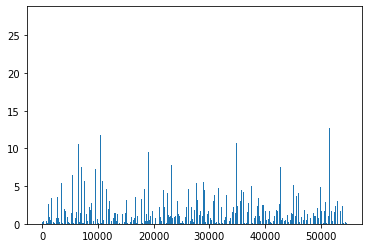

In [23]:
from matplotlib import pyplot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Perhaps features we can cleary see 7 features that stand out

We could set k=15 when configuring the SelectKBest to select these features.

## Mutual Information Feature Selection

In [24]:
# configure to select all features
fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [58]:
np.sort(fs.scores_[::-1])

array([8.34969359e-11, 1.03744796e-10, 1.26750814e-09, ...,
       2.47001216e+01, 2.51814035e+01, 2.74602569e+01])

In [25]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.040439
Feature 3: 0.125430
Feature 4: 0.028283
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 0.089140
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.043021
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.038125
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.057562
Feature 21: 0.006141
Feature 22: 0.000000
Feature 23: 0.000000
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.000000
Feature 27: 0.016453
Feature 28: 0.084236
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.124374
Feature 33: 0.084148
Feature 34: 0.026609
Feature 35: 0.024678
Feature 36: 0.000000
Feature 37: 0.078895
Feature 38: 0.000000
Feature 39: 0.064255
Feature 40: 0.000000
Feature 41: 0.000000
Feature 42: 0.000000
Feature 43: 0.116326
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.083825
Feature 47: 0.000000
Fe

Feature 2244: 0.068377
Feature 2245: 0.000000
Feature 2246: 0.066244
Feature 2247: 0.026824
Feature 2248: 0.000000
Feature 2249: 0.010241
Feature 2250: 0.102608
Feature 2251: 0.084760
Feature 2252: 0.000000
Feature 2253: 0.000000
Feature 2254: 0.060149
Feature 2255: 0.023847
Feature 2256: 0.000000
Feature 2257: 0.012459
Feature 2258: 0.007631
Feature 2259: 0.000000
Feature 2260: 0.040781
Feature 2261: 0.000000
Feature 2262: 0.049211
Feature 2263: 0.031727
Feature 2264: 0.000000
Feature 2265: 0.105868
Feature 2266: 0.087459
Feature 2267: 0.000000
Feature 2268: 0.000711
Feature 2269: 0.021047
Feature 2270: 0.000000
Feature 2271: 0.000000
Feature 2272: 0.022656
Feature 2273: 0.000000
Feature 2274: 0.000000
Feature 2275: 0.099681
Feature 2276: 0.010974
Feature 2277: 0.035971
Feature 2278: 0.040488
Feature 2279: 0.000000
Feature 2280: 0.017618
Feature 2281: 0.000000
Feature 2282: 0.000000
Feature 2283: 0.063082
Feature 2284: 0.093847
Feature 2285: 0.039711
Feature 2286: 0.000000
Feature 228

Feature 3548: 0.094661
Feature 3549: 0.000000
Feature 3550: 0.000000
Feature 3551: 0.059497
Feature 3552: 0.114441
Feature 3553: 0.000000
Feature 3554: 0.000000
Feature 3555: 0.012849
Feature 3556: 0.028419
Feature 3557: 0.000000
Feature 3558: 0.016440
Feature 3559: 0.000000
Feature 3560: 0.000000
Feature 3561: 0.000000
Feature 3562: 0.049755
Feature 3563: 0.000000
Feature 3564: 0.000000
Feature 3565: 0.000000
Feature 3566: 0.075511
Feature 3567: 0.000000
Feature 3568: 0.086378
Feature 3569: 0.000000
Feature 3570: 0.011862
Feature 3571: 0.000000
Feature 3572: 0.000000
Feature 3573: 0.000000
Feature 3574: 0.035885
Feature 3575: 0.000000
Feature 3576: 0.000000
Feature 3577: 0.073687
Feature 3578: 0.000000
Feature 3579: 0.000000
Feature 3580: 0.000000
Feature 3581: 0.006666
Feature 3582: 0.000000
Feature 3583: 0.033053
Feature 3584: 0.000000
Feature 3585: 0.072931
Feature 3586: 0.000000
Feature 3587: 0.059881
Feature 3588: 0.000000
Feature 3589: 0.055975
Feature 3590: 0.061204
Feature 359

Feature 5932: 0.068252
Feature 5933: 0.013807
Feature 5934: 0.000000
Feature 5935: 0.000000
Feature 5936: 0.058954
Feature 5937: 0.000000
Feature 5938: 0.000000
Feature 5939: 0.000000
Feature 5940: 0.000000
Feature 5941: 0.000000
Feature 5942: 0.000000
Feature 5943: 0.009941
Feature 5944: 0.000000
Feature 5945: 0.122273
Feature 5946: 0.000000
Feature 5947: 0.107604
Feature 5948: 0.000000
Feature 5949: 0.069221
Feature 5950: 0.056236
Feature 5951: 0.000000
Feature 5952: 0.000000
Feature 5953: 0.044494
Feature 5954: 0.000000
Feature 5955: 0.002442
Feature 5956: 0.068054
Feature 5957: 0.108738
Feature 5958: 0.017298
Feature 5959: 0.073689
Feature 5960: 0.004736
Feature 5961: 0.000000
Feature 5962: 0.020101
Feature 5963: 0.000000
Feature 5964: 0.000000
Feature 5965: 0.000000
Feature 5966: 0.117523
Feature 5967: 0.009183
Feature 5968: 0.105942
Feature 5969: 0.130203
Feature 5970: 0.108472
Feature 5971: 0.001219
Feature 5972: 0.047269
Feature 5973: 0.012297
Feature 5974: 0.034277
Feature 597

Feature 7243: 0.045798
Feature 7244: 0.215157
Feature 7245: 0.000000
Feature 7246: 0.000000
Feature 7247: 0.016499
Feature 7248: 0.058291
Feature 7249: 0.000000
Feature 7250: 0.000000
Feature 7251: 0.050800
Feature 7252: 0.000000
Feature 7253: 0.088832
Feature 7254: 0.042536
Feature 7255: 0.000000
Feature 7256: 0.000000
Feature 7257: 0.183602
Feature 7258: 0.000000
Feature 7259: 0.000000
Feature 7260: 0.030060
Feature 7261: 0.000000
Feature 7262: 0.041447
Feature 7263: 0.000000
Feature 7264: 0.175700
Feature 7265: 0.111121
Feature 7266: 0.061076
Feature 7267: 0.025631
Feature 7268: 0.000000
Feature 7269: 0.010226
Feature 7270: 0.000000
Feature 7271: 0.053545
Feature 7272: 0.000000
Feature 7273: 0.000000
Feature 7274: 0.000000
Feature 7275: 0.000000
Feature 7276: 0.000000
Feature 7277: 0.091004
Feature 7278: 0.010848
Feature 7279: 0.000000
Feature 7280: 0.055903
Feature 7281: 0.018799
Feature 7282: 0.000000
Feature 7283: 0.000000
Feature 7284: 0.000000
Feature 7285: 0.035840
Feature 728

Feature 9115: 0.051164
Feature 9116: 0.000000
Feature 9117: 0.000000
Feature 9118: 0.016220
Feature 9119: 0.019848
Feature 9120: 0.066481
Feature 9121: 0.000000
Feature 9122: 0.000000
Feature 9123: 0.014672
Feature 9124: 0.029487
Feature 9125: 0.108706
Feature 9126: 0.079358
Feature 9127: 0.000000
Feature 9128: 0.178545
Feature 9129: 0.000000
Feature 9130: 0.131918
Feature 9131: 0.000000
Feature 9132: 0.000000
Feature 9133: 0.000000
Feature 9134: 0.000000
Feature 9135: 0.000000
Feature 9136: 0.000000
Feature 9137: 0.030441
Feature 9138: 0.033568
Feature 9139: 0.000000
Feature 9140: 0.000000
Feature 9141: 0.000000
Feature 9142: 0.000000
Feature 9143: 0.204839
Feature 9144: 0.109486
Feature 9145: 0.135148
Feature 9146: 0.014395
Feature 9147: 0.147622
Feature 9148: 0.000000
Feature 9149: 0.000000
Feature 9150: 0.000000
Feature 9151: 0.077675
Feature 9152: 0.050189
Feature 9153: 0.000000
Feature 9154: 0.150038
Feature 9155: 0.000000
Feature 9156: 0.000000
Feature 9157: 0.000000
Feature 915

Feature 10698: 0.075680
Feature 10699: 0.032015
Feature 10700: 0.000000
Feature 10701: 0.000000
Feature 10702: 0.006259
Feature 10703: 0.000000
Feature 10704: 0.000000
Feature 10705: 0.040079
Feature 10706: 0.045145
Feature 10707: 0.027446
Feature 10708: 0.000532
Feature 10709: 0.000000
Feature 10710: 0.083440
Feature 10711: 0.131968
Feature 10712: 0.035474
Feature 10713: 0.000000
Feature 10714: 0.006760
Feature 10715: 0.020289
Feature 10716: 0.117264
Feature 10717: 0.120314
Feature 10718: 0.132941
Feature 10719: 0.000000
Feature 10720: 0.000000
Feature 10721: 0.136440
Feature 10722: 0.049971
Feature 10723: 0.000000
Feature 10724: 0.000000
Feature 10725: 0.000000
Feature 10726: 0.000000
Feature 10727: 0.140061
Feature 10728: 0.039056
Feature 10729: 0.023435
Feature 10730: 0.132645
Feature 10731: 0.121099
Feature 10732: 0.000000
Feature 10733: 0.122561
Feature 10734: 0.006480
Feature 10735: 0.000000
Feature 10736: 0.077168
Feature 10737: 0.038050
Feature 10738: 0.079872
Feature 10739: 0

Feature 12270: 0.134642
Feature 12271: 0.000000
Feature 12272: 0.009771
Feature 12273: 0.000000
Feature 12274: 0.157617
Feature 12275: 0.045727
Feature 12276: 0.001866
Feature 12277: 0.000000
Feature 12278: 0.000000
Feature 12279: 0.000000
Feature 12280: 0.159029
Feature 12281: 0.000000
Feature 12282: 0.000000
Feature 12283: 0.149554
Feature 12284: 0.022639
Feature 12285: 0.079957
Feature 12286: 0.120029
Feature 12287: 0.011295
Feature 12288: 0.026904
Feature 12289: 0.000000
Feature 12290: 0.051922
Feature 12291: 0.000000
Feature 12292: 0.037313
Feature 12293: 0.022695
Feature 12294: 0.000000
Feature 12295: 0.172320
Feature 12296: 0.000000
Feature 12297: 0.028548
Feature 12298: 0.000000
Feature 12299: 0.000000
Feature 12300: 0.099325
Feature 12301: 0.000000
Feature 12302: 0.000000
Feature 12303: 0.000000
Feature 12304: 0.000000
Feature 12305: 0.039691
Feature 12306: 0.000000
Feature 12307: 0.000000
Feature 12308: 0.000000
Feature 12309: 0.000000
Feature 12310: 0.000000
Feature 12311: 0

Feature 14113: 0.000000
Feature 14114: 0.064820
Feature 14115: 0.062555
Feature 14116: 0.019705
Feature 14117: 0.000000
Feature 14118: 0.000000
Feature 14119: 0.088982
Feature 14120: 0.018358
Feature 14121: 0.099781
Feature 14122: 0.000000
Feature 14123: 0.000000
Feature 14124: 0.000000
Feature 14125: 0.000000
Feature 14126: 0.045498
Feature 14127: 0.059307
Feature 14128: 0.000000
Feature 14129: 0.000000
Feature 14130: 0.036123
Feature 14131: 0.002787
Feature 14132: 0.040902
Feature 14133: 0.000000
Feature 14134: 0.081765
Feature 14135: 0.019672
Feature 14136: 0.087545
Feature 14137: 0.059917
Feature 14138: 0.042971
Feature 14139: 0.000000
Feature 14140: 0.000000
Feature 14141: 0.019355
Feature 14142: 0.000000
Feature 14143: 0.000000
Feature 14144: 0.050972
Feature 14145: 0.020610
Feature 14146: 0.016189
Feature 14147: 0.073886
Feature 14148: 0.073498
Feature 14149: 0.000000
Feature 14150: 0.000000
Feature 14151: 0.000000
Feature 14152: 0.000000
Feature 14153: 0.055205
Feature 14154: 0

Feature 15472: 0.068540
Feature 15473: 0.000000
Feature 15474: 0.157125
Feature 15475: 0.078059
Feature 15476: 0.000000
Feature 15477: 0.000000
Feature 15478: 0.000000
Feature 15479: 0.000000
Feature 15480: 0.000000
Feature 15481: 0.024169
Feature 15482: 0.000000
Feature 15483: 0.000000
Feature 15484: 0.000000
Feature 15485: 0.000000
Feature 15486: 0.110225
Feature 15487: 0.044991
Feature 15488: 0.000000
Feature 15489: 0.121745
Feature 15490: 0.161913
Feature 15491: 0.000000
Feature 15492: 0.042702
Feature 15493: 0.025944
Feature 15494: 0.029474
Feature 15495: 0.000000
Feature 15496: 0.000000
Feature 15497: 0.000000
Feature 15498: 0.000000
Feature 15499: 0.069512
Feature 15500: 0.000000
Feature 15501: 0.000000
Feature 15502: 0.000000
Feature 15503: 0.000000
Feature 15504: 0.000000
Feature 15505: 0.083807
Feature 15506: 0.000000
Feature 15507: 0.000000
Feature 15508: 0.000000
Feature 15509: 0.187384
Feature 15510: 0.019512
Feature 15511: 0.000000
Feature 15512: 0.000000
Feature 15513: 0

Feature 17612: 0.007981
Feature 17613: 0.015289
Feature 17614: 0.000000
Feature 17615: 0.172906
Feature 17616: 0.021498
Feature 17617: 0.168854
Feature 17618: 0.031792
Feature 17619: 0.071582
Feature 17620: 0.000000
Feature 17621: 0.000000
Feature 17622: 0.000000
Feature 17623: 0.000000
Feature 17624: 0.000000
Feature 17625: 0.000000
Feature 17626: 0.039687
Feature 17627: 0.000000
Feature 17628: 0.000000
Feature 17629: 0.000000
Feature 17630: 0.065061
Feature 17631: 0.109236
Feature 17632: 0.000000
Feature 17633: 0.000000
Feature 17634: 0.000000
Feature 17635: 0.013600
Feature 17636: 0.045164
Feature 17637: 0.000000
Feature 17638: 0.000000
Feature 17639: 0.072467
Feature 17640: 0.106639
Feature 17641: 0.000000
Feature 17642: 0.021646
Feature 17643: 0.000000
Feature 17644: 0.008957
Feature 17645: 0.000000
Feature 17646: 0.000000
Feature 17647: 0.115767
Feature 17648: 0.108434
Feature 17649: 0.000000
Feature 17650: 0.001382
Feature 17651: 0.017107
Feature 17652: 0.000000
Feature 17653: 0

Feature 19605: 0.000000
Feature 19606: 0.017449
Feature 19607: 0.000000
Feature 19608: 0.000000
Feature 19609: 0.000000
Feature 19610: 0.027843
Feature 19611: 0.000000
Feature 19612: 0.000000
Feature 19613: 0.102830
Feature 19614: 0.000000
Feature 19615: 0.000000
Feature 19616: 0.000000
Feature 19617: 0.039013
Feature 19618: 0.000000
Feature 19619: 0.000000
Feature 19620: 0.001747
Feature 19621: 0.000000
Feature 19622: 0.049886
Feature 19623: 0.000000
Feature 19624: 0.017282
Feature 19625: 0.000000
Feature 19626: 0.132772
Feature 19627: 0.090411
Feature 19628: 0.000000
Feature 19629: 0.000000
Feature 19630: 0.000000
Feature 19631: 0.000000
Feature 19632: 0.000000
Feature 19633: 0.000000
Feature 19634: 0.000000
Feature 19635: 0.052351
Feature 19636: 0.000000
Feature 19637: 0.000000
Feature 19638: 0.079640
Feature 19639: 0.000000
Feature 19640: 0.000000
Feature 19641: 0.000000
Feature 19642: 0.001740
Feature 19643: 0.000000
Feature 19644: 0.074402
Feature 19645: 0.037187
Feature 19646: 0

Feature 21111: 0.000000
Feature 21112: 0.000000
Feature 21113: 0.011838
Feature 21114: 0.000000
Feature 21115: 0.000000
Feature 21116: 0.051771
Feature 21117: 0.000000
Feature 21118: 0.104206
Feature 21119: 0.147012
Feature 21120: 0.090784
Feature 21121: 0.035224
Feature 21122: 0.285395
Feature 21123: 0.000000
Feature 21124: 0.006050
Feature 21125: 0.003480
Feature 21126: 0.180903
Feature 21127: 0.046983
Feature 21128: 0.023948
Feature 21129: 0.057066
Feature 21130: 0.069061
Feature 21131: 0.010068
Feature 21132: 0.006236
Feature 21133: 0.089124
Feature 21134: 0.025308
Feature 21135: 0.009140
Feature 21136: 0.000000
Feature 21137: 0.060752
Feature 21138: 0.000000
Feature 21139: 0.057677
Feature 21140: 0.000000
Feature 21141: 0.135672
Feature 21142: 0.000000
Feature 21143: 0.000000
Feature 21144: 0.028363
Feature 21145: 0.006394
Feature 21146: 0.051138
Feature 21147: 0.031394
Feature 21148: 0.000000
Feature 21149: 0.028598
Feature 21150: 0.000000
Feature 21151: 0.000000
Feature 21152: 0

Feature 22633: 0.000000
Feature 22634: 0.082680
Feature 22635: 0.024410
Feature 22636: 0.000000
Feature 22637: 0.066251
Feature 22638: 0.046736
Feature 22639: 0.101098
Feature 22640: 0.002867
Feature 22641: 0.010752
Feature 22642: 0.000000
Feature 22643: 0.198847
Feature 22644: 0.024093
Feature 22645: 0.000000
Feature 22646: 0.084628
Feature 22647: 0.000000
Feature 22648: 0.000000
Feature 22649: 0.115688
Feature 22650: 0.104283
Feature 22651: 0.000000
Feature 22652: 0.048236
Feature 22653: 0.000000
Feature 22654: 0.000000
Feature 22655: 0.031639
Feature 22656: 0.000000
Feature 22657: 0.009869
Feature 22658: 0.103030
Feature 22659: 0.148078
Feature 22660: 0.000000
Feature 22661: 0.059482
Feature 22662: 0.000000
Feature 22663: 0.000000
Feature 22664: 0.000000
Feature 22665: 0.000000
Feature 22666: 0.000000
Feature 22667: 0.000000
Feature 22668: 0.101022
Feature 22669: 0.000000
Feature 22670: 0.001235
Feature 22671: 0.046680
Feature 22672: 0.000000
Feature 22673: 0.000000
Feature 22674: 0

Feature 24345: 0.101453
Feature 24346: 0.047459
Feature 24347: 0.000000
Feature 24348: 0.000000
Feature 24349: 0.000000
Feature 24350: 0.011330
Feature 24351: 0.000000
Feature 24352: 0.063692
Feature 24353: 0.084061
Feature 24354: 0.000000
Feature 24355: 0.000000
Feature 24356: 0.018661
Feature 24357: 0.031197
Feature 24358: 0.000000
Feature 24359: 0.115253
Feature 24360: 0.018444
Feature 24361: 0.013974
Feature 24362: 0.000000
Feature 24363: 0.000000
Feature 24364: 0.000000
Feature 24365: 0.024759
Feature 24366: 0.000000
Feature 24367: 0.013523
Feature 24368: 0.000000
Feature 24369: 0.067211
Feature 24370: 0.000000
Feature 24371: 0.051133
Feature 24372: 0.053639
Feature 24373: 0.000000
Feature 24374: 0.000878
Feature 24375: 0.000000
Feature 24376: 0.178545
Feature 24377: 0.000000
Feature 24378: 0.065685
Feature 24379: 0.032124
Feature 24380: 0.000000
Feature 24381: 0.000000
Feature 24382: 0.083346
Feature 24383: 0.000000
Feature 24384: 0.032956
Feature 24385: 0.000000
Feature 24386: 0

Feature 25316: 0.036540
Feature 25317: 0.000000
Feature 25318: 0.000000
Feature 25319: 0.000000
Feature 25320: 0.000000
Feature 25321: 0.000000
Feature 25322: 0.089522
Feature 25323: 0.000000
Feature 25324: 0.076064
Feature 25325: 0.014086
Feature 25326: 0.000000
Feature 25327: 0.012557
Feature 25328: 0.000000
Feature 25329: 0.058764
Feature 25330: 0.048053
Feature 25331: 0.000000
Feature 25332: 0.010475
Feature 25333: 0.000000
Feature 25334: 0.043006
Feature 25335: 0.054586
Feature 25336: 0.000000
Feature 25337: 0.000000
Feature 25338: 0.000000
Feature 25339: 0.036291
Feature 25340: 0.037394
Feature 25341: 0.000000
Feature 25342: 0.054943
Feature 25343: 0.000000
Feature 25344: 0.044037
Feature 25345: 0.069448
Feature 25346: 0.000000
Feature 25347: 0.000000
Feature 25348: 0.022163
Feature 25349: 0.000000
Feature 25350: 0.114440
Feature 25351: 0.043392
Feature 25352: 0.044265
Feature 25353: 0.000000
Feature 25354: 0.000000
Feature 25355: 0.108132
Feature 25356: 0.040827
Feature 25357: 0

Feature 27109: 0.015197
Feature 27110: 0.095204
Feature 27111: 0.146102
Feature 27112: 0.059703
Feature 27113: 0.016742
Feature 27114: 0.013768
Feature 27115: 0.027497
Feature 27116: 0.000000
Feature 27117: 0.024104
Feature 27118: 0.128615
Feature 27119: 0.067878
Feature 27120: 0.055228
Feature 27121: 0.000000
Feature 27122: 0.121950
Feature 27123: 0.087520
Feature 27124: 0.009132
Feature 27125: 0.000000
Feature 27126: 0.018862
Feature 27127: 0.000000
Feature 27128: 0.000000
Feature 27129: 0.017425
Feature 27130: 0.046480
Feature 27131: 0.011776
Feature 27132: 0.000000
Feature 27133: 0.000000
Feature 27134: 0.104776
Feature 27135: 0.000000
Feature 27136: 0.012865
Feature 27137: 0.069687
Feature 27138: 0.000000
Feature 27139: 0.010625
Feature 27140: 0.000000
Feature 27141: 0.000000
Feature 27142: 0.004615
Feature 27143: 0.026695
Feature 27144: 0.000000
Feature 27145: 0.049106
Feature 27146: 0.144079
Feature 27147: 0.061545
Feature 27148: 0.000000
Feature 27149: 0.000000
Feature 27150: 0

Feature 28730: 0.000000
Feature 28731: 0.000000
Feature 28732: 0.000000
Feature 28733: 0.000000
Feature 28734: 0.000000
Feature 28735: 0.136416
Feature 28736: 0.016773
Feature 28737: 0.011708
Feature 28738: 0.000000
Feature 28739: 0.000000
Feature 28740: 0.108757
Feature 28741: 0.075029
Feature 28742: 0.201846
Feature 28743: 0.000000
Feature 28744: 0.016034
Feature 28745: 0.011719
Feature 28746: 0.000000
Feature 28747: 0.031195
Feature 28748: 0.000000
Feature 28749: 0.000000
Feature 28750: 0.000000
Feature 28751: 0.000000
Feature 28752: 0.042607
Feature 28753: 0.196507
Feature 28754: 0.000000
Feature 28755: 0.000000
Feature 28756: 0.000000
Feature 28757: 0.000000
Feature 28758: 0.000000
Feature 28759: 0.000000
Feature 28760: 0.000000
Feature 28761: 0.054037
Feature 28762: 0.000000
Feature 28763: 0.118100
Feature 28764: 0.019833
Feature 28765: 0.000000
Feature 28766: 0.021513
Feature 28767: 0.064108
Feature 28768: 0.000000
Feature 28769: 0.000000
Feature 28770: 0.068736
Feature 28771: 0

Feature 30608: 0.048466
Feature 30609: 0.107925
Feature 30610: 0.000000
Feature 30611: 0.114474
Feature 30612: 0.000000
Feature 30613: 0.019194
Feature 30614: 0.009573
Feature 30615: 0.000000
Feature 30616: 0.000000
Feature 30617: 0.000000
Feature 30618: 0.000000
Feature 30619: 0.066828
Feature 30620: 0.000000
Feature 30621: 0.000000
Feature 30622: 0.000000
Feature 30623: 0.000000
Feature 30624: 0.000000
Feature 30625: 0.000000
Feature 30626: 0.000000
Feature 30627: 0.000000
Feature 30628: 0.000000
Feature 30629: 0.113962
Feature 30630: 0.058871
Feature 30631: 0.041907
Feature 30632: 0.045529
Feature 30633: 0.119986
Feature 30634: 0.025306
Feature 30635: 0.000000
Feature 30636: 0.022127
Feature 30637: 0.000000
Feature 30638: 0.044011
Feature 30639: 0.000000
Feature 30640: 0.096243
Feature 30641: 0.000000
Feature 30642: 0.039067
Feature 30643: 0.000000
Feature 30644: 0.024394
Feature 30645: 0.000000
Feature 30646: 0.076666
Feature 30647: 0.083935
Feature 30648: 0.000000
Feature 30649: 0

Feature 32211: 0.008147
Feature 32212: 0.080504
Feature 32213: 0.000000
Feature 32214: 0.017963
Feature 32215: 0.000000
Feature 32216: 0.000000
Feature 32217: 0.000000
Feature 32218: 0.005888
Feature 32219: 0.000000
Feature 32220: 0.074268
Feature 32221: 0.087390
Feature 32222: 0.025110
Feature 32223: 0.000000
Feature 32224: 0.000000
Feature 32225: 0.038155
Feature 32226: 0.063233
Feature 32227: 0.000000
Feature 32228: 0.109423
Feature 32229: 0.000000
Feature 32230: 0.079964
Feature 32231: 0.000000
Feature 32232: 0.006155
Feature 32233: 0.000000
Feature 32234: 0.059219
Feature 32235: 0.000000
Feature 32236: 0.000000
Feature 32237: 0.000000
Feature 32238: 0.000000
Feature 32239: 0.000000
Feature 32240: 0.118522
Feature 32241: 0.018533
Feature 32242: 0.005900
Feature 32243: 0.000000
Feature 32244: 0.000000
Feature 32245: 0.054918
Feature 32246: 0.084864
Feature 32247: 0.000000
Feature 32248: 0.053735
Feature 32249: 0.000000
Feature 32250: 0.000000
Feature 32251: 0.049876
Feature 32252: 0

Feature 34107: 0.000000
Feature 34108: 0.000000
Feature 34109: 0.000000
Feature 34110: 0.085832
Feature 34111: 0.000000
Feature 34112: 0.015529
Feature 34113: 0.000000
Feature 34114: 0.029120
Feature 34115: 0.252363
Feature 34116: 0.050613
Feature 34117: 0.053604
Feature 34118: 0.039044
Feature 34119: 0.043381
Feature 34120: 0.000000
Feature 34121: 0.000000
Feature 34122: 0.061639
Feature 34123: 0.000000
Feature 34124: 0.035187
Feature 34125: 0.144612
Feature 34126: 0.140902
Feature 34127: 0.000000
Feature 34128: 0.000000
Feature 34129: 0.095097
Feature 34130: 0.055562
Feature 34131: 0.000000
Feature 34132: 0.000000
Feature 34133: 0.057291
Feature 34134: 0.000000
Feature 34135: 0.000000
Feature 34136: 0.116154
Feature 34137: 0.000000
Feature 34138: 0.001964
Feature 34139: 0.000000
Feature 34140: 0.006049
Feature 34141: 0.113789
Feature 34142: 0.000000
Feature 34143: 0.018188
Feature 34144: 0.027200
Feature 34145: 0.000000
Feature 34146: 0.000000
Feature 34147: 0.027046
Feature 34148: 0

Feature 36089: 0.014770
Feature 36090: 0.141804
Feature 36091: 0.000000
Feature 36092: 0.107150
Feature 36093: 0.000000
Feature 36094: 0.089299
Feature 36095: 0.078981
Feature 36096: 0.000000
Feature 36097: 0.072346
Feature 36098: 0.185465
Feature 36099: 0.000000
Feature 36100: 0.000000
Feature 36101: 0.000000
Feature 36102: 0.113681
Feature 36103: 0.003441
Feature 36104: 0.000000
Feature 36105: 0.000000
Feature 36106: 0.156031
Feature 36107: 0.000000
Feature 36108: 0.000000
Feature 36109: 0.000000
Feature 36110: 0.000000
Feature 36111: 0.067186
Feature 36112: 0.000000
Feature 36113: 0.000000
Feature 36114: 0.000000
Feature 36115: 0.005362
Feature 36116: 0.000000
Feature 36117: 0.000000
Feature 36118: 0.000000
Feature 36119: 0.000000
Feature 36120: 0.099767
Feature 36121: 0.092661
Feature 36122: 0.073276
Feature 36123: 0.121749
Feature 36124: 0.000000
Feature 36125: 0.041908
Feature 36126: 0.097664
Feature 36127: 0.027228
Feature 36128: 0.030037
Feature 36129: 0.000000
Feature 36130: 0

Feature 37606: 0.077923
Feature 37607: 0.027271
Feature 37608: 0.000000
Feature 37609: 0.000000
Feature 37610: 0.176180
Feature 37611: 0.000000
Feature 37612: 0.008443
Feature 37613: 0.000000
Feature 37614: 0.000000
Feature 37615: 0.000000
Feature 37616: 0.000000
Feature 37617: 0.000000
Feature 37618: 0.057942
Feature 37619: 0.000000
Feature 37620: 0.000000
Feature 37621: 0.026449
Feature 37622: 0.063776
Feature 37623: 0.154995
Feature 37624: 0.000000
Feature 37625: 0.000000
Feature 37626: 0.134450
Feature 37627: 0.008332
Feature 37628: 0.072948
Feature 37629: 0.094504
Feature 37630: 0.006193
Feature 37631: 0.051531
Feature 37632: 0.086115
Feature 37633: 0.117310
Feature 37634: 0.168482
Feature 37635: 0.000000
Feature 37636: 0.000000
Feature 37637: 0.024187
Feature 37638: 0.154307
Feature 37639: 0.200115
Feature 37640: 0.000000
Feature 37641: 0.000000
Feature 37642: 0.000000
Feature 37643: 0.000000
Feature 37644: 0.000000
Feature 37645: 0.073839
Feature 37646: 0.000000
Feature 37647: 0

Feature 39475: 0.047474
Feature 39476: 0.000000
Feature 39477: 0.177445
Feature 39478: 0.060656
Feature 39479: 0.000000
Feature 39480: 0.000000
Feature 39481: 0.000000
Feature 39482: 0.000000
Feature 39483: 0.000000
Feature 39484: 0.000000
Feature 39485: 0.028060
Feature 39486: 0.000000
Feature 39487: 0.000000
Feature 39488: 0.073969
Feature 39489: 0.030074
Feature 39490: 0.027163
Feature 39491: 0.024179
Feature 39492: 0.025153
Feature 39493: 0.042531
Feature 39494: 0.005741
Feature 39495: 0.000000
Feature 39496: 0.000000
Feature 39497: 0.178720
Feature 39498: 0.000000
Feature 39499: 0.000000
Feature 39500: 0.148680
Feature 39501: 0.053182
Feature 39502: 0.011847
Feature 39503: 0.017763
Feature 39504: 0.000000
Feature 39505: 0.000000
Feature 39506: 0.101608
Feature 39507: 0.000000
Feature 39508: 0.000000
Feature 39509: 0.049603
Feature 39510: 0.006497
Feature 39511: 0.002425
Feature 39512: 0.000000
Feature 39513: 0.071402
Feature 39514: 0.005045
Feature 39515: 0.012931
Feature 39516: 0

Feature 40636: 0.026361
Feature 40637: 0.080079
Feature 40638: 0.000000
Feature 40639: 0.000000
Feature 40640: 0.112912
Feature 40641: 0.030108
Feature 40642: 0.043449
Feature 40643: 0.000000
Feature 40644: 0.000000
Feature 40645: 0.129664
Feature 40646: 0.007243
Feature 40647: 0.021623
Feature 40648: 0.033077
Feature 40649: 0.059604
Feature 40650: 0.000000
Feature 40651: 0.000000
Feature 40652: 0.000000
Feature 40653: 0.186058
Feature 40654: 0.088689
Feature 40655: 0.077219
Feature 40656: 0.012587
Feature 40657: 0.001291
Feature 40658: 0.095348
Feature 40659: 0.219871
Feature 40660: 0.083306
Feature 40661: 0.019388
Feature 40662: 0.000000
Feature 40663: 0.010889
Feature 40664: 0.022070
Feature 40665: 0.000000
Feature 40666: 0.043505
Feature 40667: 0.014980
Feature 40668: 0.017260
Feature 40669: 0.000000
Feature 40670: 0.033511
Feature 40671: 0.000000
Feature 40672: 0.039380
Feature 40673: 0.027330
Feature 40674: 0.024174
Feature 40675: 0.000282
Feature 40676: 0.088511
Feature 40677: 0

Feature 42105: 0.000000
Feature 42106: 0.069847
Feature 42107: 0.026672
Feature 42108: 0.000000
Feature 42109: 0.000000
Feature 42110: 0.025326
Feature 42111: 0.034981
Feature 42112: 0.036804
Feature 42113: 0.053996
Feature 42114: 0.006444
Feature 42115: 0.000000
Feature 42116: 0.128910
Feature 42117: 0.000000
Feature 42118: 0.000000
Feature 42119: 0.081275
Feature 42120: 0.000000
Feature 42121: 0.020924
Feature 42122: 0.000000
Feature 42123: 0.000000
Feature 42124: 0.002314
Feature 42125: 0.028982
Feature 42126: 0.048248
Feature 42127: 0.175460
Feature 42128: 0.052910
Feature 42129: 0.000000
Feature 42130: 0.000000
Feature 42131: 0.066045
Feature 42132: 0.000490
Feature 42133: 0.000000
Feature 42134: 0.000000
Feature 42135: 0.061348
Feature 42136: 0.000000
Feature 42137: 0.000000
Feature 42138: 0.000000
Feature 42139: 0.000000
Feature 42140: 0.061534
Feature 42141: 0.047276
Feature 42142: 0.000000
Feature 42143: 0.044260
Feature 42144: 0.027633
Feature 42145: 0.000000
Feature 42146: 0

Feature 43464: 0.000000
Feature 43465: 0.000000
Feature 43466: 0.032434
Feature 43467: 0.000000
Feature 43468: 0.030886
Feature 43469: 0.018640
Feature 43470: 0.106505
Feature 43471: 0.000000
Feature 43472: 0.073615
Feature 43473: 0.004715
Feature 43474: 0.000000
Feature 43475: 0.026870
Feature 43476: 0.049160
Feature 43477: 0.000000
Feature 43478: 0.063530
Feature 43479: 0.052522
Feature 43480: 0.069871
Feature 43481: 0.098877
Feature 43482: 0.003615
Feature 43483: 0.103764
Feature 43484: 0.080799
Feature 43485: 0.057007
Feature 43486: 0.000000
Feature 43487: 0.098982
Feature 43488: 0.021910
Feature 43489: 0.000000
Feature 43490: 0.066554
Feature 43491: 0.007768
Feature 43492: 0.000000
Feature 43493: 0.000000
Feature 43494: 0.000000
Feature 43495: 0.005257
Feature 43496: 0.008734
Feature 43497: 0.003623
Feature 43498: 0.000000
Feature 43499: 0.000000
Feature 43500: 0.030694
Feature 43501: 0.000000
Feature 43502: 0.021672
Feature 43503: 0.019863
Feature 43504: 0.000000
Feature 43505: 0

Feature 45104: 0.068362
Feature 45105: 0.035671
Feature 45106: 0.033856
Feature 45107: 0.014663
Feature 45108: 0.000000
Feature 45109: 0.113342
Feature 45110: 0.000000
Feature 45111: 0.097670
Feature 45112: 0.028381
Feature 45113: 0.046601
Feature 45114: 0.000000
Feature 45115: 0.000000
Feature 45116: 0.059375
Feature 45117: 0.062183
Feature 45118: 0.000000
Feature 45119: 0.157545
Feature 45120: 0.068082
Feature 45121: 0.000000
Feature 45122: 0.000000
Feature 45123: 0.114371
Feature 45124: 0.045768
Feature 45125: 0.000000
Feature 45126: 0.101784
Feature 45127: 0.009153
Feature 45128: 0.173025
Feature 45129: 0.062895
Feature 45130: 0.013545
Feature 45131: 0.035044
Feature 45132: 0.000000
Feature 45133: 0.038741
Feature 45134: 0.113714
Feature 45135: 0.000000
Feature 45136: 0.086031
Feature 45137: 0.044813
Feature 45138: 0.000000
Feature 45139: 0.000000
Feature 45140: 0.031820
Feature 45141: 0.000000
Feature 45142: 0.000000
Feature 45143: 0.000000
Feature 45144: 0.000000
Feature 45145: 0

Feature 47103: 0.000000
Feature 47104: 0.000000
Feature 47105: 0.039778
Feature 47106: 0.000000
Feature 47107: 0.031092
Feature 47108: 0.025755
Feature 47109: 0.000000
Feature 47110: 0.000000
Feature 47111: 0.000000
Feature 47112: 0.061974
Feature 47113: 0.147783
Feature 47114: 0.000000
Feature 47115: 0.039141
Feature 47116: 0.000000
Feature 47117: 0.073069
Feature 47118: 0.015829
Feature 47119: 0.097304
Feature 47120: 0.037791
Feature 47121: 0.053879
Feature 47122: 0.000964
Feature 47123: 0.000000
Feature 47124: 0.071100
Feature 47125: 0.000000
Feature 47126: 0.000000
Feature 47127: 0.095923
Feature 47128: 0.034790
Feature 47129: 0.029544
Feature 47130: 0.018301
Feature 47131: 0.045855
Feature 47132: 0.000000
Feature 47133: 0.000000
Feature 47134: 0.000000
Feature 47135: 0.056479
Feature 47136: 0.000000
Feature 47137: 0.000000
Feature 47138: 0.000000
Feature 47139: 0.000000
Feature 47140: 0.000000
Feature 47141: 0.000000
Feature 47142: 0.077949
Feature 47143: 0.000000
Feature 47144: 0

Feature 48612: 0.000000
Feature 48613: 0.000000
Feature 48614: 0.007759
Feature 48615: 0.067577
Feature 48616: 0.096933
Feature 48617: 0.000000
Feature 48618: 0.098603
Feature 48619: 0.000000
Feature 48620: 0.000000
Feature 48621: 0.085415
Feature 48622: 0.000000
Feature 48623: 0.000000
Feature 48624: 0.000000
Feature 48625: 0.086762
Feature 48626: 0.075135
Feature 48627: 0.000000
Feature 48628: 0.000000
Feature 48629: 0.000000
Feature 48630: 0.000000
Feature 48631: 0.000000
Feature 48632: 0.000000
Feature 48633: 0.000000
Feature 48634: 0.057762
Feature 48635: 0.000000
Feature 48636: 0.000000
Feature 48637: 0.000000
Feature 48638: 0.034284
Feature 48639: 0.066511
Feature 48640: 0.000000
Feature 48641: 0.131130
Feature 48642: 0.171126
Feature 48643: 0.000000
Feature 48644: 0.000918
Feature 48645: 0.100101
Feature 48646: 0.000000
Feature 48647: 0.000000
Feature 48648: 0.071025
Feature 48649: 0.000000
Feature 48650: 0.037491
Feature 48651: 0.003269
Feature 48652: 0.055267
Feature 48653: 0

Feature 50276: 0.000000
Feature 50277: 0.000000
Feature 50278: 0.018077
Feature 50279: 0.000000
Feature 50280: 0.000000
Feature 50281: 0.000000
Feature 50282: 0.004696
Feature 50283: 0.049776
Feature 50284: 0.000000
Feature 50285: 0.007184
Feature 50286: 0.005276
Feature 50287: 0.003162
Feature 50288: 0.000000
Feature 50289: 0.000000
Feature 50290: 0.000000
Feature 50291: 0.013134
Feature 50292: 0.051403
Feature 50293: 0.000000
Feature 50294: 0.000000
Feature 50295: 0.000000
Feature 50296: 0.000000
Feature 50297: 0.023808
Feature 50298: 0.000000
Feature 50299: 0.000000
Feature 50300: 0.000000
Feature 50301: 0.090103
Feature 50302: 0.078055
Feature 50303: 0.033763
Feature 50304: 0.019653
Feature 50305: 0.000000
Feature 50306: 0.000000
Feature 50307: 0.000000
Feature 50308: 0.000000
Feature 50309: 0.128038
Feature 50310: 0.065847
Feature 50311: 0.067864
Feature 50312: 0.091068
Feature 50313: 0.000000
Feature 50314: 0.009504
Feature 50315: 0.000000
Feature 50316: 0.078854
Feature 50317: 0

Feature 51956: 0.000000
Feature 51957: 0.040031
Feature 51958: 0.056325
Feature 51959: 0.112483
Feature 51960: 0.000000
Feature 51961: 0.119713
Feature 51962: 0.000000
Feature 51963: 0.140114
Feature 51964: 0.000000
Feature 51965: 0.032276
Feature 51966: 0.031767
Feature 51967: 0.020480
Feature 51968: 0.111361
Feature 51969: 0.027084
Feature 51970: 0.000000
Feature 51971: 0.027537
Feature 51972: 0.000000
Feature 51973: 0.020224
Feature 51974: 0.000000
Feature 51975: 0.043126
Feature 51976: 0.000000
Feature 51977: 0.000000
Feature 51978: 0.020673
Feature 51979: 0.043603
Feature 51980: 0.000000
Feature 51981: 0.000000
Feature 51982: 0.025863
Feature 51983: 0.000000
Feature 51984: 0.000000
Feature 51985: 0.000000
Feature 51986: 0.000000
Feature 51987: 0.198838
Feature 51988: 0.000000
Feature 51989: 0.047609
Feature 51990: 0.000000
Feature 51991: 0.036315
Feature 51992: 0.024822
Feature 51993: 0.055602
Feature 51994: 0.000000
Feature 51995: 0.000000
Feature 51996: 0.000000
Feature 51997: 0

Feature 53257: 0.000000
Feature 53258: 0.090752
Feature 53259: 0.052381
Feature 53260: 0.090493
Feature 53261: 0.102014
Feature 53262: 0.000000
Feature 53263: 0.000000
Feature 53264: 0.057847
Feature 53265: 0.000000
Feature 53266: 0.000000
Feature 53267: 0.000000
Feature 53268: 0.000000
Feature 53269: 0.000000
Feature 53270: 0.000000
Feature 53271: 0.031601
Feature 53272: 0.000000
Feature 53273: 0.000000
Feature 53274: 0.000000
Feature 53275: 0.008621
Feature 53276: 0.000000
Feature 53277: 0.008998
Feature 53278: 0.096234
Feature 53279: 0.071682
Feature 53280: 0.093535
Feature 53281: 0.015558
Feature 53282: 0.094329
Feature 53283: 0.031728
Feature 53284: 0.000000
Feature 53285: 0.000000
Feature 53286: 0.100252
Feature 53287: 0.008125
Feature 53288: 0.000000
Feature 53289: 0.011672
Feature 53290: 0.000000
Feature 53291: 0.000000
Feature 53292: 0.002663
Feature 53293: 0.003682
Feature 53294: 0.000000
Feature 53295: 0.025672
Feature 53296: 0.000000
Feature 53297: 0.000000
Feature 53298: 0

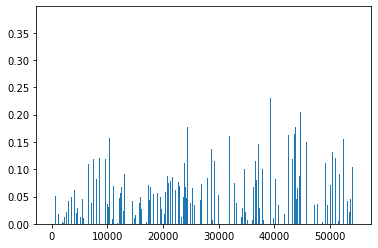

In [79]:
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that some of the features have a modestly low score, suggesting that perhaps they can be removed.

Perhaps features 1 and 5 are most relevant.

## ----
There are many different techniques for scoring features and selecting features based on scores; how do you know which one to use?

A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

In this section, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by ANOVA f-test and those features selected via mutual information.

## Model Built Using All Features

In [26]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.77


In this case, we can see that the model achieves a classification accuracy of about 80.77 percent.

### Model Built Using ANOVA f-test Features

In [31]:
import warnings
warnings.filterwarnings('ignore')

Test_Results = []
#54676
for i in range(1,100):  
    def select_features(X_train, y_train, X_test):
        # configure to select a subset of features
        fs = SelectKBest(score_func=f_classif, k=i)
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs



    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    Test_Results.append([i,accuracy*100])
    
    #print('Accuracy: %.2f' % (accuracy*100))
#print(Test_Results)

Since with only 75 we can already see a improve, we decided to go with k=75 for anova f-test

In [28]:
for t in Test_Results:
    if (t[1] > 84):
        print(t)
        


[75, 84.61538461538461]
[76, 84.61538461538461]
[77, 84.61538461538461]
[78, 84.61538461538461]


In [34]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=99)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs



X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
Test_Results.append([i,accuracy*100])

print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 80.77


In this case, we can make  difference compared to the baseline model. This is interesting as we know the method chose a different  features.

### Model Built Using Mutual Information Features

In [84]:
import warnings
warnings.filterwarnings('ignore')

Test_Results = []
#54676

for i in range(5,10):     
    # feature selection
    def select_features(X_train, y_train, X_test):
        # configure to select a subset of features
        fs = SelectKBest(score_func=mutual_info_classif, k=i)
        # learn relationship from training data
        fs.fit(X_train, y_train)
        # transform train input data
        X_train_fs = fs.transform(X_train)
        # transform test input data
        X_test_fs = fs.transform(X_test)
        return X_train_fs, X_test_fs, fs

    X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
    # fit the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train_fs, y_train)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    #print('Accuracy: %.2f' % (accuracy*100))
    Test_Results.append([i,accuracy*100])

In [88]:
for t in Test_Results:
    if (t[1] > 60):
        print(t)

[1, 73.07692307692307]
[2, 73.07692307692307]
[3, 73.07692307692307]
[4, 69.23076923076923]


## 3. Clustering Samples using Partitional Clustering

Use **`K`-means** to cluster the samples:

* Cluster the original data (54.675 features): **X**.
    * Use different values of `K`.
    * For each value of `K` present the clustering by specifying how many samples MB-CL and Other are in each cluster.     
    For instance, `{0: {'MB-CL': 51, 'Other': 0}, 1: {'MB-CL': 0, 'Other': 25}}` is the ideal clustering that we aimed at obtained with K-means when `K=2`, where the first cluster has 51 MB-CL samples and 0 Other samples and the second cluster has 0 MB-CL samples and 25 Other samples.
    You can choose how to output this information.  **Tip**: You can explore the usage of contigency matrices.
    * What is the best value of `K` ? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data obtained after removing features with low variance: **X_variance**.
    * Study different values of `K` as above.

* Cluster the data obtained after applying PCA: **X_PCA**.
    * Study different values of `K` as above.

* Compare the results obtained in the three datasets above for the best `K`. 
* Discuss the results.

In [344]:
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [540]:
#labels_dict = {index:np.array(np.unique(labels))[index] for index in range(0,len(np.array(np.unique(labels))))}
#labels_dict

#mapped_predictions = [ labels_dict[x] for x in result]
#dict(Counter(mapped_predictions))

In [556]:
def get_samples_per_cluster_kmeans(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [584]:
def get_ss_kmeans(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [582]:
def comparing_ss_kmeans(k,X1, X2, X3):
    slc1, slc2, slc3 = {}, {}, {}
    for k in range(2, k):
        kmeans1 = KMeans(n_clusters=k, random_state=0).fit(X1)
        pred_classes1 = kmeans1.labels_
        slc1[k] = silhouette_score(X1,pred_classes1)
        
        kmeans2 = KMeans(n_clusters=k, random_state=0).fit(X2)
        pred_classes2 = kmeans2.labels_
        slc2[k] = silhouette_score(X2,pred_classes2)
        
        kmeans3 = KMeans(n_clusters=k, random_state=0).fit(X3)
        pred_classes3 = kmeans3.labels_
        slc3[k] = silhouette_score(X3,pred_classes3)
        
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='X')
    plt.legend(loc="upper right")
    plt.plot(list(slc2.keys()), list(slc2.values()), label='X_variance')
    plt.legend(loc="upper right")
    plt.plot(list(slc3.keys()), list(slc3.values()), label='X_PCA')
    plt.legend(loc="upper right")
    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

- For the original data X

In [352]:
get_samples_per_cluster_kmeans(11, X) 

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 28, 'Other': 5}
Cluster  2 {'Other': 11, 'MB-CL': 12}
For K = 4
Cluster  0 {'MB-CL': 24, 'Other': 4}
Cluster  1 {'Other': 12, 'MB-CL': 16}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8, 'Other': 2}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 3}
Cluster  1 {'MB-CL': 23, 'Other': 6}
Cluster  2 {'MB-CL': 11, 'Other': 2}
Cluster  3 {'MB-CL': 8, 'Other': 1}
Cluster  4 {'Other': 8, 'MB-CL': 6}
For K = 6
Cluster  0 {'Other': 12, 'MB-CL': 21}
Cluster  1 {'MB-CL': 6}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 15, 'Other': 2}
Cluster  4 {'Other': 1, 'MB-CL': 4}
Cluster  5 {'MB-CL': 2, 'Other': 3}
For K = 7
Cluster  0 {'Other': 5, 'MB-CL': 21}
Cluster  1 {'MB-CL': 6}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 11, 'Other': 2}
Cluster  4 {'Other': 1, 'MB-CL': 4}
Cluster  5 {'MB-CL': 2, 'Other': 3}
Cluster  6

For K = 2 The avg SS is : 0.1
For K = 3 The avg SS is : 0.07
For K = 4 The avg SS is : 0.09
For K = 5 The avg SS is : 0.08
For K = 6 The avg SS is : 0.07
For K = 7 The avg SS is : 0.07
For K = 8 The avg SS is : 0.05
For K = 9 The avg SS is : 0.06
For K = 10 The avg SS is : 0.05


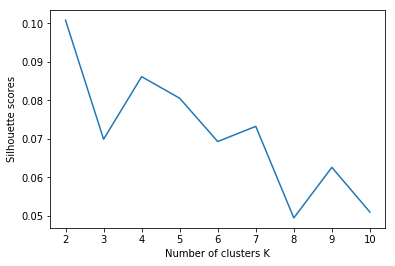

In [559]:
get_ss_kmeans(11,X)

- For X_variance

In [557]:
get_samples_per_cluster_kmeans(11, X_variance)

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'Other': 8, 'MB-CL': 8}
Cluster  1 {'MB-CL': 32, 'Other': 7}
Cluster  2 {'MB-CL': 11, 'Other': 10}
For K = 4
Cluster  0 {'Other': 13, 'MB-CL': 18}
Cluster  1 {'MB-CL': 8}
Cluster  2 {'Other': 8, 'MB-CL': 3}
Cluster  3 {'MB-CL': 22, 'Other': 4}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 3}
Cluster  1 {'Other': 6, 'MB-CL': 13}
Cluster  2 {'MB-CL': 22, 'Other': 4}
Cluster  3 {'MB-CL': 5, 'Other': 7}
Cluster  4 {'MB-CL': 8}
For K = 6
Cluster  0 {'Other': 7, 'MB-CL': 15}
Cluster  1 {'MB-CL': 6}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 20, 'Other': 4}
Cluster  4 {'MB-CL': 5, 'Other': 5}
Cluster  5 {'MB-CL': 2, 'Other': 2}
For K = 7
Cluster  0 {'MB-CL': 20, 'Other': 4}
Cluster  1 {'Other': 3, 'MB-CL': 4}
Cluster  2 {'MB-CL': 10, 'Other': 3}
Cluster  3 {'Other': 7, 'MB-CL': 3}
Cluster  4 {'MB-CL': 2, 'Other': 3}
Cluster  5 {'Other': 5, 'MB-CL': 6}
Cluster  6 {'MB-CL': 6}


For K = 2 The avg SS is : 0.2
For K = 3 The avg SS is : 0.16
For K = 4 The avg SS is : 0.18
For K = 5 The avg SS is : 0.15
For K = 6 The avg SS is : 0.14
For K = 7 The avg SS is : 0.12
For K = 8 The avg SS is : 0.13
For K = 9 The avg SS is : 0.09
For K = 10 The avg SS is : 0.11


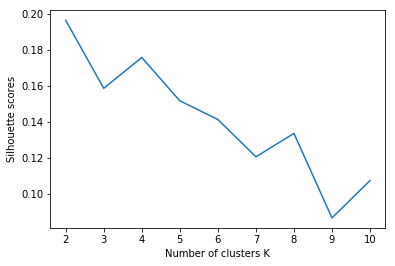

In [574]:
get_ss_kmeans(11,X_variance)

   - For X_PCA

In [363]:
get_samples_per_cluster_kmeans(11, X_PCA)

For K = 2
Cluster  0 {'MB-CL': 11, 'Other': 4}
Cluster  1 {'MB-CL': 28, 'Other': 17}
For K = 3
Cluster  0 {'Other': 6, 'MB-CL': 5}
Cluster  1 {'MB-CL': 23, 'Other': 10}
Cluster  2 {'MB-CL': 11, 'Other': 5}
For K = 4
Cluster  0 {'Other': 5, 'MB-CL': 5}
Cluster  1 {'MB-CL': 6, 'Other': 1}
Cluster  2 {'MB-CL': 23, 'Other': 11}
Cluster  3 {'MB-CL': 5, 'Other': 4}
For K = 5
Cluster  0 {'MB-CL': 14, 'Other': 10}
Cluster  1 {'Other': 7, 'MB-CL': 9}
Cluster  2 {'MB-CL': 5, 'Other': 3}
Cluster  3 {'MB-CL': 6, 'Other': 1}
Cluster  4 {'MB-CL': 5}
For K = 6
Cluster  0 {'MB-CL': 18, 'Other': 9}
Cluster  1 {'MB-CL': 9, 'Other': 6}
Cluster  2 {'MB-CL': 5, 'Other': 1}
Cluster  3 {'MB-CL': 1, 'Other': 1}
Cluster  4 {'MB-CL': 1}
Cluster  5 {'MB-CL': 5, 'Other': 4}
For K = 7
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 12, 'Other': 8}
Cluster  2 {'MB-CL': 14, 'Other': 8}
Cluster  3 {'MB-CL': 5, 'Other': 4}
Cluster  4 {'MB-CL': 5, 'Other': 1}
Cluster  5 {'MB-CL': 1}
Cluster  6 {'MB-CL': 1}
For K = 8
Clust

For K = 2 The average silhouette score is : 0.12
For K = 3 The average silhouette score is : 0.1
For K = 4 The average silhouette score is : 0.12
For K = 5 The average silhouette score is : 0.09
For K = 6 The average silhouette score is : 0.1
For K = 7 The average silhouette score is : 0.09
For K = 8 The average silhouette score is : 0.08
For K = 9 The average silhouette score is : 0.07
For K = 10 The average silhouette score is : 0.07


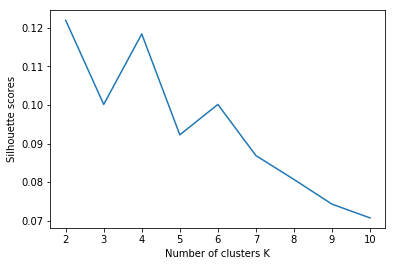

In [389]:
get_ss_kmeans(11,X_PCA)

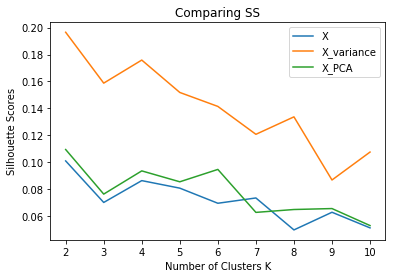

In [583]:
comparing_ss_kmeans(11,X, X_variance, X_PCA)


- Partitional clustering divides data objects into nonoverlapping groups. As such, object can be a member of more than one cluster, and every cluster must have at least one object.

- Silhouette score is used to evaluate the quality of clusters (how well samples are clustered with other samples that are similar to each other.)


- For all three datasets, we observed that the best K (the one that yieled the highest Silhouette Score) was 2, meaning that there are two clusters - which could indicate that when we proceed with feature selection with the selected variance threshold in (2), 2 can be the number of optimal clusters).

- Keeping in mind that the best value for the SS is 1 and that values near 0 indicate overlapping clusters, we observed that when K=2, the average SS was the highest for the X_variance dataset (0.2), followed by X_PCA (0.12) and lastly the original X (0.1)

## 4. Clustering Samples using Hierarchical Clustering

Use a **Hierarchical Clustering Algorithm (HCA)** to cluster the samples: 

* Cluster the data in **X_variance**.
    * Use **different linkage metrics**.
    * Use different values of `K`.
    * For each linkage metric and value of `K` present the clustering by specifying how many MB-CL and Other samples are in each cluster as you did before. 
    * What is the best linkage metric and the best value of `K`? Justify using the clustering results and the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

* Cluster the data in **X_PCA**.
    * Study different linkage metrics and different values of `K` as above.

* Compare the results obtained in the two datasets above for the best linkage metric and the best `K`. 
* Discuss the results

In [368]:
from sklearn.cluster import AgglomerativeClustering

In [365]:
#The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

#‘ward’ minimizes the variance of the clusters being merged.

#‘average’ uses the average of the distances of each observation of the two sets.

#‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

#‘single’ uses the minimum of the distances between all observations of the two sets.

In [716]:
def get_samples_per_cluster_hca(k, X):
    labels = np.array(y['class'])
    linkage = ['ward', 'complete', 'average', 'single']
    for k in range(2, k):
        print('For K =', k)
        for l in linkage:
            print('Linkage method =',l)
            clustering = AgglomerativeClustering(linkage=l,n_clusters=k).fit(X)
            pred_classes = clustering.labels_
            for i in np.array(np.unique(pred_classes)):
                print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)])))

In [712]:
def comparing_ss_hca_methods(k,X):
    slc1, slc2, slc3, slc4 = {}, {}, {}, {}
    for k in range(2, k):
        hca1 = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X)
        pred_classes1 = hca1.labels_
        slc1[k] = silhouette_score(X,pred_classes1)

        hca2 = AgglomerativeClustering(n_clusters=k, linkage='complete').fit(X)
        pred_classes2 = hca2.labels_
        slc2[k] = silhouette_score(X,pred_classes2)

        hca3 = AgglomerativeClustering(n_clusters=k, linkage='average').fit(X)
        pred_classes3 = hca3.labels_
        slc3[k] = silhouette_score(X,pred_classes3)
             
    plt.figure()
    plt.plot(list(slc1.keys()), list(slc1.values()), label='Ward method')
    plt.legend(loc="upper right")
    plt.plot(list(slc2.keys()), list(slc2.values()), label='Complete method')
    plt.legend(loc="upper right")
    plt.plot(list(slc3.keys()), list(slc3.values()), label='Average method')
    plt.legend(loc="upper right")

    plt.xlabel("Number of Clusters K")
    plt.ylabel("Silhouette Scores")
    plt.title('Comparing SS')
    plt.show()  

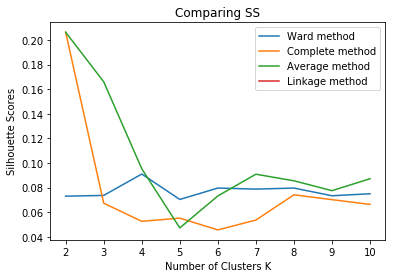

In [714]:
comparing_ss_hca_methods(11,X)

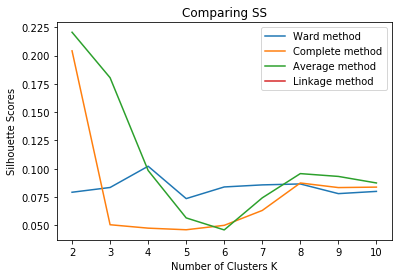

In [713]:
comparing_ss_hca_methods(11,X_PCA)

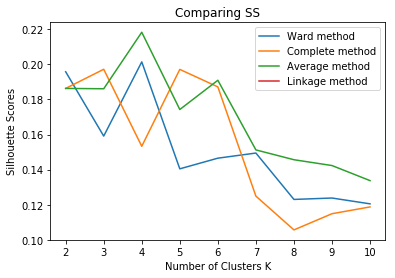

In [715]:
comparing_ss_hca_methods(11,X_variance)

In [717]:
get_samples_per_cluster_hca(11, X)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 21, 'Other': 18}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Linkage method = complete
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 13, 'Other': 9}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Cluster  2 {'Other': 9, 'MB-CL': 8}
Linkage method = complete
Cluster  0 {'MB-CL': 10, 'Other': 2}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 41, 'Other': 22}
Linkage method = average
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 30, 'Other': 7}
Cluster  1 {'MB-CL': 10, 'Other': 2}
Cluster  2 {'Other': 9, 'MB-CL': 8}
Cl

In [718]:
get_samples_per_cluster_hca(11, X_variance)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 40, 'Other': 18}
Cluster  1 {'MB-CL': 11, 'Other': 7}
Linkage method = complete
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 11, 'Other': 7}
Cluster  1 {'MB-CL': 31, 'Other': 7}
Cluster  2 {'Other': 11, 'MB-CL': 9}
Linkage method = complete
Cluster  0 {'MB-CL': 40, 'Other': 17}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 11, 'Other': 7}
Linkage method = average
Cluster  0 {'MB-CL': 43, 'Other': 22}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 8, 'Other': 2}
Linkage method = single
Cluster  0 {'MB-CL': 43, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 8}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 31, 'Other': 7}
Cluster  1 {'MB-CL': 8}
Cluster  2 {'Other': 11, 'MB-CL': 9}
C

In [719]:
get_samples_per_cluster_hca(11, X_PCA)

For K = 2
Linkage method = ward
Cluster  0 {'MB-CL': 21, 'Other': 18}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Linkage method = complete
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'MB-CL': 1, 'Other': 1}
Linkage method = average
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
Linkage method = single
Cluster  0 {'MB-CL': 51, 'Other': 24}
Cluster  1 {'Other': 1}
For K = 3
Linkage method = ward
Cluster  0 {'MB-CL': 13, 'Other': 9}
Cluster  1 {'MB-CL': 30, 'Other': 7}
Cluster  2 {'Other': 9, 'MB-CL': 8}
Linkage method = complete
Cluster  0 {'MB-CL': 1, 'Other': 1}
Cluster  1 {'MB-CL': 37, 'Other': 22}
Cluster  2 {'MB-CL': 13, 'Other': 2}
Linkage method = average
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
Linkage method = single
Cluster  0 {'MB-CL': 50, 'Other': 24}
Cluster  1 {'Other': 1}
Cluster  2 {'MB-CL': 1}
For K = 4
Linkage method = ward
Cluster  0 {'MB-CL': 30, 'Other': 7}
Cluster  1 {'MB-CL': 10, 'Other': 2}
Cluster  2 {'O

In [ ]:
# Write code in cells like this ...

## 5. Evaluating Clustering Results

In this task you should compare the best results obtained using `K`-means and HCA 
1. **Without using ground truth**
2. **Using ground truth (`Medulloblastoma Type`)**.

### 5.1. Without Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [ ]:
# Write code in cells like this ...
#https://stats.stackexchange.com/questions/21807/evaluation-measures-of-goodness-or-validity-of-clustering-without-having-truth

### 5.2. Using Ground Truth

**Choose one adequate measure** from those available by Sciki-learn (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) to evaluate the different clusterings. 

Discuss the results.

In [823]:
import operator

In [837]:
def comparing_kmeans_ground_truth(k,X):
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
    highest_ss_k = max(mydict.items(), key=operator.itemgetter(1))[0]
    kmeans = KMeans(n_clusters=highest_ss_k, random_state=0).fit(X)
    labels = kmeans.labels_
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

In [838]:
comparing_kmeans_ground_truth(11,X)

For K = 2
Homogeneity: 0.029
Completeness: 0.031
V-measure: 0.030
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.019


In [839]:
comparing_kmeans_ground_truth(11,X_variance)

For K = 2
Homogeneity: 0.029
Completeness: 0.031
V-measure: 0.030
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.019


In [840]:
comparing_kmeans_ground_truth(11,X_PCA)

For K = 2
Homogeneity: 0.029
Completeness: 0.031
V-measure: 0.030
Adjusted Rand Index: 0.069
Adjusted Mutual Information: 0.019


In [858]:
def comparing_hca_ground_truth(k,X):
    labels_true=y['class']
    slc = {}
    for k in range(2, k):
        hca = AgglomerativeClustering(n_clusters=k).fit(X)
        pred_classes = hca.labels_
        slc[k] = silhouette_score(X,pred_classes)
        
    highest_ss_k = max(mydict.items(), key=operator.itemgetter(1))[0]
    hca1 = AgglomerativeClustering(n_clusters=highest_ss_k).fit(X)
    labels = hca1.labels_
    
    print('For K =', highest_ss_k)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f"
          % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

In [855]:
comparing_hca_ground_truth(11,X)

For K = 2
Homogeneity: 0.068
Completeness: 0.062
V-measure: 0.065
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.055


In [859]:
comparing_hca_ground_truth(11,X_variance)

For K = 2
Homogeneity: 0.004
Completeness: 0.005
V-measure: 0.004
Adjusted Rand Index: 0.016
Adjusted Mutual Information: -0.007


In [860]:
comparing_hca_ground_truth(11,X_PCA)

For K = 2
Homogeneity: 0.068
Completeness: 0.062
V-measure: 0.065
Adjusted Rand Index: 0.058
Adjusted Mutual Information: 0.055


## 6. Clustering Samples using Density-based Clustering

Use DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) or OPTICS (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) to cluster the samples.

Compare the results with those of K-means and HCA.

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

In [774]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [791]:
def dbscan_func(X):
    db = DBSCAN(min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('Estimated number of clusters = %d' % n_clusters_)
    print('Estimated number of noise points = %d' % n_noise_)

In [792]:
dbscan_func(X)

Estimated number of clusters = 0
Estimated number of noise points = 76


In [793]:
dbscan_func(X_variance)

Estimated number of clusters = 0
Estimated number of noise points = 76


In [794]:
dbscan_func(X_PCA)

Estimated number of clusters = 0
Estimated number of noise points = 76


## 7. Choose a Different Clustering Algorithm to Group the Samples

Choose **a clustering algorithm** besides `K`-means, HCA and DBSCAN/OPTICS to cluster the samples. 

**Groups of 3 People** must choose two different algorithms.

Justify your choice and compare the results with those of `K`-means, HCA and DBSCAN/OPTICS.

In [806]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering

In [796]:
def get_samples_per_cluster_mini_kmeans(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [802]:
def get_ss_mini_kmeans(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [807]:
def get_samples_per_cluster_spec(k, X):
    labels = np.array(y['class'])
    for k in range(2, k):
        mini_kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = mini_kmeans.labels_

        print('For K =', k)
        for i in np.array(np.unique(pred_classes)):
            print('Cluster ', i, dict(Counter(labels[np.where(pred_classes == i)]))) #labels -- ver

In [808]:
def get_ss_mini_spec(k,X):
    slc = {}
    for k in range(2, k):
        kmeans = SpectralClustering(n_clusters=k, random_state=0).fit(X)
        pred_classes = kmeans.labels_
        slc[k] = silhouette_score(X,pred_classes)
        print("For K =", k, "The avg SS is :", np.round(silhouette_score(X, pred_classes),2))
    plt.figure()
    plt.plot(list(slc.keys()), list(slc.values()))
    plt.xlabel("Number of clusters K")
    plt.ylabel("Silhouette scores")
    plt.show()  

In [799]:
get_samples_per_cluster_mini_kmeans(11,X)

For K = 2
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 40, 'Other': 16}
For K = 3
Cluster  0 {'Other': 14, 'MB-CL': 17}
Cluster  1 {'MB-CL': 24, 'Other': 8}
Cluster  2 {'MB-CL': 10, 'Other': 3}
For K = 4
Cluster  0 {'MB-CL': 10, 'Other': 4}
Cluster  1 {'MB-CL': 24, 'Other': 6}
Cluster  2 {'Other': 7, 'MB-CL': 6}
Cluster  3 {'MB-CL': 11, 'Other': 8}
For K = 5
Cluster  0 {'Other': 9, 'MB-CL': 6}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 9, 'Other': 3}
Cluster  3 {'MB-CL': 25, 'Other': 6}
Cluster  4 {'MB-CL': 8}
For K = 6
Cluster  0 {'MB-CL': 5, 'Other': 2}
Cluster  1 {'MB-CL': 21, 'Other': 5}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8}
Cluster  4 {'Other': 11, 'MB-CL': 11}
Cluster  5 {'MB-CL': 3}
For K = 7
Cluster  0 {'MB-CL': 3, 'Other': 2}
Cluster  1 {'Other': 5, 'MB-CL': 6}
Cluster  2 {'MB-CL': 10, 'Other': 3}
Cluster  3 {'Other': 7, 'MB-CL': 3}
Cluster  4 {'MB-CL': 8}
Cluster  5 {'MB-CL': 5, 'Other': 2}
Cluster  6 {'MB-CL': 16, 'Other': 6}


In [800]:
get_samples_per_cluster_mini_kmeans(11,X_variance)

For K = 2
Cluster  0 {'MB-CL': 40, 'Other': 15}
Cluster  1 {'MB-CL': 11, 'Other': 10}
For K = 3
Cluster  0 {'MB-CL': 40, 'Other': 18}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 8}
For K = 4
Cluster  0 {'Other': 12, 'MB-CL': 13}
Cluster  1 {'MB-CL': 27, 'Other': 6}
Cluster  2 {'Other': 7, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8}
For K = 5
Cluster  0 {'MB-CL': 10, 'Other': 3}
Cluster  1 {'Other': 8, 'MB-CL': 3}
Cluster  2 {'Other': 10, 'MB-CL': 8}
Cluster  3 {'MB-CL': 22, 'Other': 4}
Cluster  4 {'MB-CL': 8}
For K = 6
Cluster  0 {'Other': 1, 'MB-CL': 3}
Cluster  1 {'MB-CL': 20, 'Other': 5}
Cluster  2 {'Other': 8, 'MB-CL': 3}
Cluster  3 {'MB-CL': 8}
Cluster  4 {'MB-CL': 11, 'Other': 3}
Cluster  5 {'Other': 8, 'MB-CL': 6}
For K = 7
Cluster  0 {'MB-CL': 3, 'Other': 1}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 8}
Cluster  3 {'MB-CL': 12, 'Other': 3}
Cluster  4 {'MB-CL': 16, 'Other': 4}
Cluster  5 {'Other': 5, 'MB-CL': 4}
Cluster  6 {'MB-CL': 5, 'Other': 5}
For K = 8
Cl

In [801]:
get_samples_per_cluster_mini_kmeans(11,X_PCA)

For K = 2
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'MB-CL': 40, 'Other': 16}
For K = 3
Cluster  0 {'Other': 14, 'MB-CL': 17}
Cluster  1 {'MB-CL': 16, 'Other': 6}
Cluster  2 {'MB-CL': 18, 'Other': 5}
For K = 4
Cluster  0 {'MB-CL': 5, 'Other': 5}
Cluster  1 {'MB-CL': 20, 'Other': 6}
Cluster  2 {'MB-CL': 11, 'Other': 10}
Cluster  3 {'MB-CL': 15, 'Other': 4}
For K = 5
Cluster  0 {'Other': 8, 'MB-CL': 7}
Cluster  1 {'Other': 7, 'MB-CL': 3}
Cluster  2 {'MB-CL': 9, 'Other': 2}
Cluster  3 {'MB-CL': 24, 'Other': 5}
Cluster  4 {'MB-CL': 8, 'Other': 3}
For K = 6
Cluster  0 {'MB-CL': 10, 'Other': 2}
Cluster  1 {'MB-CL': 3, 'Other': 1}
Cluster  2 {'MB-CL': 8}
Cluster  3 {'Other': 11, 'MB-CL': 11}
Cluster  4 {'Other': 8, 'MB-CL': 3}
Cluster  5 {'MB-CL': 16, 'Other': 3}
For K = 7
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 2, 'Other': 1}
Cluster  2 {'MB-CL': 9, 'Other': 3}
Cluster  3 {'Other': 7, 'MB-CL': 3}
Cluster  4 {'MB-CL': 8}
Cluster  5 {'MB-CL': 5, 'Other': 5}
Cluster  6 {'MB-CL': 23,

For K = 2 The avg SS is : 0.1
For K = 3 The avg SS is : 0.02
For K = 4 The avg SS is : 0.06
For K = 5 The avg SS is : 0.09
For K = 6 The avg SS is : 0.06
For K = 7 The avg SS is : 0.06
For K = 8 The avg SS is : 0.07
For K = 9 The avg SS is : 0.02
For K = 10 The avg SS is : 0.03


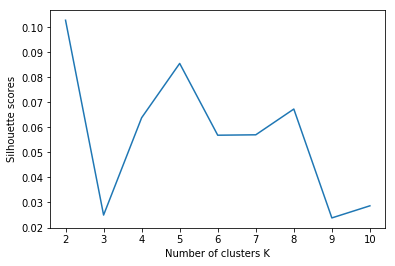

In [803]:
get_ss_mini_kmeans(11,X)

For K = 2 The avg SS is : 0.2
For K = 3 The avg SS is : 0.22
For K = 4 The avg SS is : 0.19
For K = 5 The avg SS is : 0.14
For K = 6 The avg SS is : 0.13
For K = 7 The avg SS is : 0.13
For K = 8 The avg SS is : 0.1
For K = 9 The avg SS is : 0.1
For K = 10 The avg SS is : 0.12


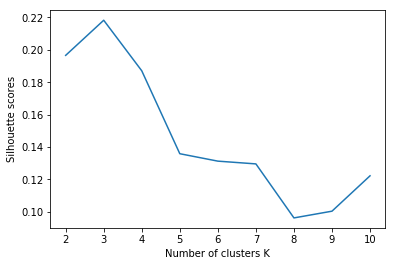

In [804]:
get_ss_mini_kmeans(11,X_variance)

For K = 2 The avg SS is : 0.11
For K = 3 The avg SS is : 0.04
For K = 4 The avg SS is : 0.06
For K = 5 The avg SS is : 0.09
For K = 6 The avg SS is : 0.06
For K = 7 The avg SS is : 0.04
For K = 8 The avg SS is : 0.04
For K = 9 The avg SS is : 0.04
For K = 10 The avg SS is : 0.03


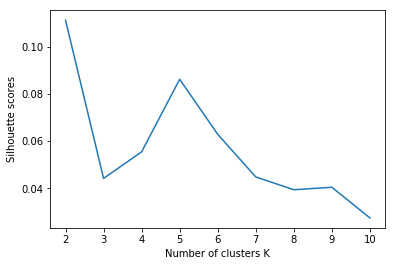

In [805]:
get_ss_mini_kmeans(11,X_PCA)

In [809]:
get_samples_per_cluster_spec(11, X)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 2
Cluster  0 {'Other': 11, 'MB-CL': 18}
Cluster  1 {'MB-CL': 33, 'Other': 14}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 3
Cluster  0 {'MB-CL': 27, 'Other': 11}
Cluster  1 {'MB-CL': 10, 'Other': 7}
Cluster  2 {'MB-CL': 14, 'Other': 7}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 4
Cluster  0 {'MB-CL': 12, 'Other': 4}
Cluster  1 {'MB-CL': 5, 'Other': 3}
Cluster  2 {'MB-CL': 27, 'Other': 15}
Cluster  3 {'MB-CL': 7, 'Other': 3}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 5
Cluster  0 {'MB-CL': 1, 'Other': 1}
Cluster  1 {'MB-CL': 11, 'Other': 6}
Cluster  2 {'MB-CL': 5, 'Other': 5}
Cluster  3 {'MB-CL': 22, 'Other': 10}
Cluster  4 {'MB-CL': 12, 'Other': 3}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6
Cluster  0 {'MB-CL': 25, 'Other': 14}
Cluster  1 {'Other': 3, 'MB-CL': 1}
Cluster  2 {'MB-CL': 5, 'Other': 1}
Cluster  3 {'MB-CL': 12, 'Other': 5}
Cluster  4 {'MB-CL': 2, 'Other': 1}
Cluster  5 {'MB-CL': 6, 'Other': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 7
Cluster  0 {'MB-CL': 3, 'Other': 1}
Cluster  1 {'MB-CL': 21, 'Other': 11}
Cluster  2 {'Other': 1, 'MB-CL': 3}
Cluster  3 {'Other': 1}
Cluster  4 {'MB-CL': 16, 'Other': 5}
Cluster  5 {'MB-CL': 3, 'Other': 2}
Cluster  6 {'MB-CL': 5, 'Other': 4}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8
Cluster  0 {'MB-CL': 29, 'Other': 14}
Cluster  1 {'Other': 6, 'MB-CL': 2}
Cluster  2 {'MB-CL': 3, 'Other': 2}
Cluster  3 {'MB-CL': 1}
Cluster  4 {'Other': 2}
Cluster  5 {'MB-CL': 4, 'Other': 1}
Cluster  6 {'MB-CL': 6}
Cluster  7 {'MB-CL': 6}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 9
Cluster  0 {'Other': 3, 'MB-CL': 8}
Cluster  1 {'MB-CL': 4}
Cluster  2 {'MB-CL': 6, 'Other': 4}
Cluster  3 {'MB-CL': 4, 'Other': 1}
Cluster  4 {'MB-CL': 5}
Cluster  5 {'MB-CL': 12, 'Other': 5}
Cluster  6 {'MB-CL': 6, 'Other': 9}
Cluster  7 {'MB-CL': 1, 'Other': 1}
Cluster  8 {'Other': 2, 'MB-CL': 5}
For K = 10
Cluster  0 {'MB-CL': 4}
Cluster  1 {'MB-CL': 11, 'Other': 4}
Cluster  2 {'MB-CL': 24, 'Other': 12}
Cluster  3 {'MB-CL': 1}
Cluster  4 {'MB-CL': 9, 'Other': 4}
Cluster  5 {'Other': 1}
Cluster  6 {'MB-CL': 1, 'Other': 1}
Cluster  7 {'MB-CL': 1, 'Other': 1}
Cluster  8 {'Other': 1}
Cluster  9 {'Other': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [810]:
get_samples_per_cluster_spec(11, X_variance)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 2
Cluster  0 {'MB-CL': 27, 'Other': 8}
Cluster  1 {'MB-CL': 24, 'Other': 17}
For K = 3
Cluster  0 {'MB-CL': 16, 'Other': 3}
Cluster  1 {'MB-CL': 22, 'Other': 16}
Cluster  2 {'MB-CL': 13, 'Other': 6}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 4
Cluster  0 {'MB-CL': 6, 'Other': 4}
Cluster  1 {'MB-CL': 16, 'Other': 7}
Cluster  2 {'MB-CL': 23, 'Other': 10}
Cluster  3 {'Other': 4, 'MB-CL': 6}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 5
Cluster  0 {'MB-CL': 4, 'Other': 1}
Cluster  1 {'MB-CL': 10, 'Other': 5}
Cluster  2 {'MB-CL': 8, 'Other': 2}
Cluster  3 {'Other': 2, 'MB-CL': 4}
Cluster  4 {'MB-CL': 25, 'Other': 15}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6
Cluster  0 {'MB-CL': 7, 'Other': 2}
Cluster  1 {'Other': 6, 'MB-CL': 7}
Cluster  2 {'MB-CL': 5, 'Other': 2}
Cluster  3 {'MB-CL': 5, 'Other': 1}
Cluster  4 {'MB-CL': 13, 'Other': 10}
Cluster  5 {'MB-CL': 14, 'Other': 4}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 7
Cluster  0 {'Other': 4, 'MB-CL': 1}
Cluster  1 {'MB-CL': 10, 'Other': 4}
Cluster  2 {'MB-CL': 27, 'Other': 12}
Cluster  3 {'MB-CL': 1}
Cluster  4 {'MB-CL': 4, 'Other': 1}
Cluster  5 {'MB-CL': 3, 'Other': 2}
Cluster  6 {'Other': 2, 'MB-CL': 5}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8
Cluster  0 {'MB-CL': 4}
Cluster  1 {'Other': 6, 'MB-CL': 14}
Cluster  2 {'MB-CL': 10, 'Other': 3}
Cluster  3 {'Other': 3, 'MB-CL': 7}
Cluster  4 {'MB-CL': 14, 'Other': 11}
Cluster  5 {'Other': 1}
Cluster  6 {'MB-CL': 1}
Cluster  7 {'Other': 1, 'MB-CL': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 9
Cluster  0 {'MB-CL': 7, 'Other': 1}
Cluster  1 {'MB-CL': 9, 'Other': 5}
Cluster  2 {'MB-CL': 3, 'Other': 2}
Cluster  3 {'MB-CL': 6}
Cluster  4 {'MB-CL': 1, 'Other': 1}
Cluster  5 {'MB-CL': 5, 'Other': 4}
Cluster  6 {'MB-CL': 4, 'Other': 3}
Cluster  7 {'Other': 2, 'MB-CL': 3}
Cluster  8 {'MB-CL': 13, 'Other': 7}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 10
Cluster  0 {'MB-CL': 9, 'Other': 2}
Cluster  1 {'Other': 3, 'MB-CL': 9}
Cluster  2 {'Other': 1}
Cluster  3 {'MB-CL': 23, 'Other': 17}
Cluster  4 {'Other': 1}
Cluster  5 {'MB-CL': 2}
Cluster  6 {'MB-CL': 1}
Cluster  7 {'MB-CL': 3, 'Other': 1}
Cluster  8 {'MB-CL': 1}
Cluster  9 {'MB-CL': 3}


In [811]:
get_samples_per_cluster_spec(11, X_PCA)

For K = 2
Cluster  0 {'MB-CL': 23, 'Other': 13}
Cluster  1 {'MB-CL': 28, 'Other': 12}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 3
Cluster  0 {'MB-CL': 23, 'Other': 13}
Cluster  1 {'MB-CL': 9, 'Other': 6}
Cluster  2 {'MB-CL': 19, 'Other': 6}
For K = 4
Cluster  0 {'MB-CL': 1}
Cluster  1 {'MB-CL': 31, 'Other': 15}
Cluster  2 {'MB-CL': 3, 'Other': 5}
Cluster  3 {'MB-CL': 16, 'Other': 5}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 5
Cluster  0 {'MB-CL': 26, 'Other': 10}
Cluster  1 {'Other': 13, 'MB-CL': 18}
Cluster  2 {'MB-CL': 2}
Cluster  3 {'MB-CL': 5, 'Other': 1}
Cluster  4 {'Other': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6
Cluster  0 {'Other': 2, 'MB-CL': 1}
Cluster  1 {'MB-CL': 14, 'Other': 10}
Cluster  2 {'MB-CL': 14, 'Other': 4}
Cluster  3 {'MB-CL': 13, 'Other': 6}
Cluster  4 {'MB-CL': 3, 'Other': 1}
Cluster  5 {'MB-CL': 6, 'Other': 2}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 7
Cluster  0 {'MB-CL': 18, 'Other': 11}
Cluster  1 {'MB-CL': 5, 'Other': 2}
Cluster  2 {'MB-CL': 8, 'Other': 5}
Cluster  3 {'MB-CL': 6, 'Other': 5}
Cluster  4 {'MB-CL': 5, 'Other': 1}
Cluster  5 {'MB-CL': 8, 'Other': 1}
Cluster  6 {'MB-CL': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8
Cluster  0 {'MB-CL': 11, 'Other': 9}
Cluster  1 {'Other': 3, 'MB-CL': 2}
Cluster  2 {'MB-CL': 7, 'Other': 1}
Cluster  3 {'MB-CL': 1}
Cluster  4 {'MB-CL': 20, 'Other': 8}
Cluster  5 {'MB-CL': 5, 'Other': 2}
Cluster  6 {'MB-CL': 4, 'Other': 1}
Cluster  7 {'MB-CL': 1, 'Other': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 9
Cluster  0 {'MB-CL': 2}
Cluster  1 {'MB-CL': 13, 'Other': 6}
Cluster  2 {'MB-CL': 1}
Cluster  3 {'MB-CL': 7, 'Other': 8}
Cluster  4 {'MB-CL': 10, 'Other': 6}
Cluster  5 {'MB-CL': 1}
Cluster  6 {'MB-CL': 15, 'Other': 5}
Cluster  7 {'MB-CL': 1}
Cluster  8 {'MB-CL': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 10
Cluster  0 {'MB-CL': 6}
Cluster  1 {'Other': 2, 'MB-CL': 1}
Cluster  2 {'Other': 1, 'MB-CL': 1}
Cluster  3 {'Other': 2, 'MB-CL': 2}
Cluster  4 {'MB-CL': 1, 'Other': 2}
Cluster  5 {'Other': 4, 'MB-CL': 3}
Cluster  6 {'MB-CL': 15, 'Other': 3}
Cluster  7 {'MB-CL': 20, 'Other': 10}
Cluster  8 {'MB-CL': 1}
Cluster  9 {'Other': 1, 'MB-CL': 1}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 2 The avg SS is : 0.01


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 3 The avg SS is : -0.01


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 4 The avg SS is : -0.02


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 5 The avg SS is : -0.03


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6 The avg SS is : -0.03


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 7 The avg SS is : -0.07


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8 The avg SS is : -0.07


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 9 The avg SS is : -0.12


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 10 The avg SS is : -0.1


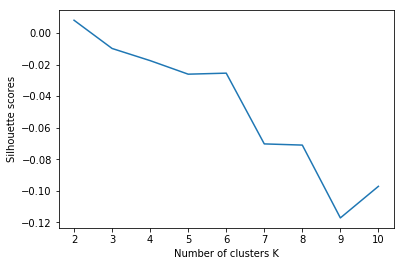

In [812]:
get_ss_mini_spec(11,X)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 2 The avg SS is : 0.0


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 3 The avg SS is : -0.01


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 4 The avg SS is : -0.07


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 5 The avg SS is : -0.03


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6 The avg SS is : -0.11


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 7 The avg SS is : -0.13


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8 The avg SS is : -0.11


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 9 The avg SS is : -0.12


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 10 The avg SS is : -0.14


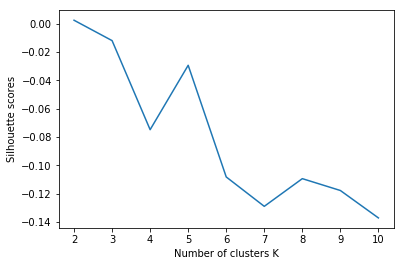

In [813]:
get_ss_mini_spec(11,X_variance)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 2 The avg SS is : -0.0
For K = 3 The avg SS is : -0.01


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 4 The avg SS is : -0.04
For K = 5 The avg SS is : -0.06


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 6 The avg SS is : -0.07
For K = 7 The avg SS is : -0.05


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 8 The avg SS is : -0.08
For K = 9 The avg SS is : -0.13


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


For K = 10 The avg SS is : -0.14


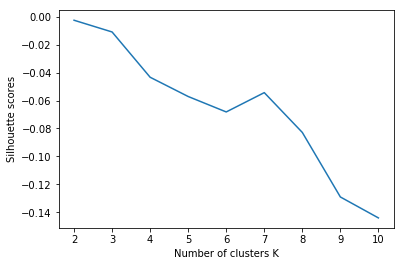

In [814]:
get_ss_mini_spec(11,X_PCA)

## 8. Conclusions

Draw some conclusions about this project work. Can you highlight some insights about meduloblastoma types? 

In [ ]:
# Write code in cells like this ...

Write text in cells like this...